In [1]:
import sys

sys.path.append("../")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.optimizers import MGD , NAG , ADG , RMS , ADAM

In [3]:
def F_1D(x):
    return x**2

def GradF_1D(x):
    return 2 * x

def F_2D(X):
    x,y = X
    return x**2 + y**2

def GradF_2D(X):
    x,y = X
    return [2*x , 2*y]

## Momentum Gradient Descent

$$ v_t = \beta v_{t-1} + (1-\beta) \nabla J(\theta_t) $$

$$ \theta_{t+1} = \theta_t -\alpha v_t$$

a.) $$ f(x) = x^2 $$

The minimum is given at

$$ f(0) = 0 $$

In [4]:
alpha = [0.01 , .1 , .5 , .9]
model = MGD

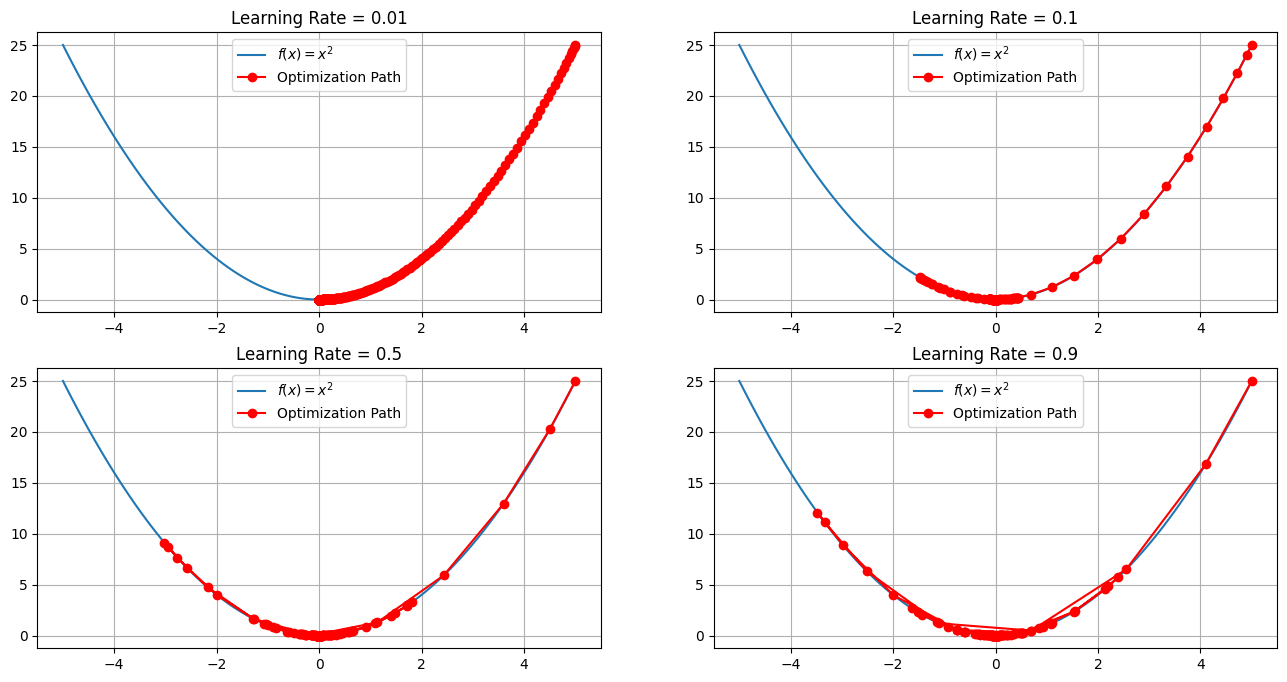

In [5]:
x = np.linspace(-5, 5, 100)
y = F_1D(x)
X0 = 5.0

fig, axs = plt.subplots(2,2,figsize=(16, 8))
for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X, cost = optimizer.optimize(F_1D,GradF_1D,X0)
    path_x = np.array( [q for q,j in cost] )
    path_y = np.array( [j for q,j in cost] )
    axs[ int(q/2), q % 2].plot(x, y , label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].plot(path_x, path_y , "ro-" , label="Optimization Path")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)

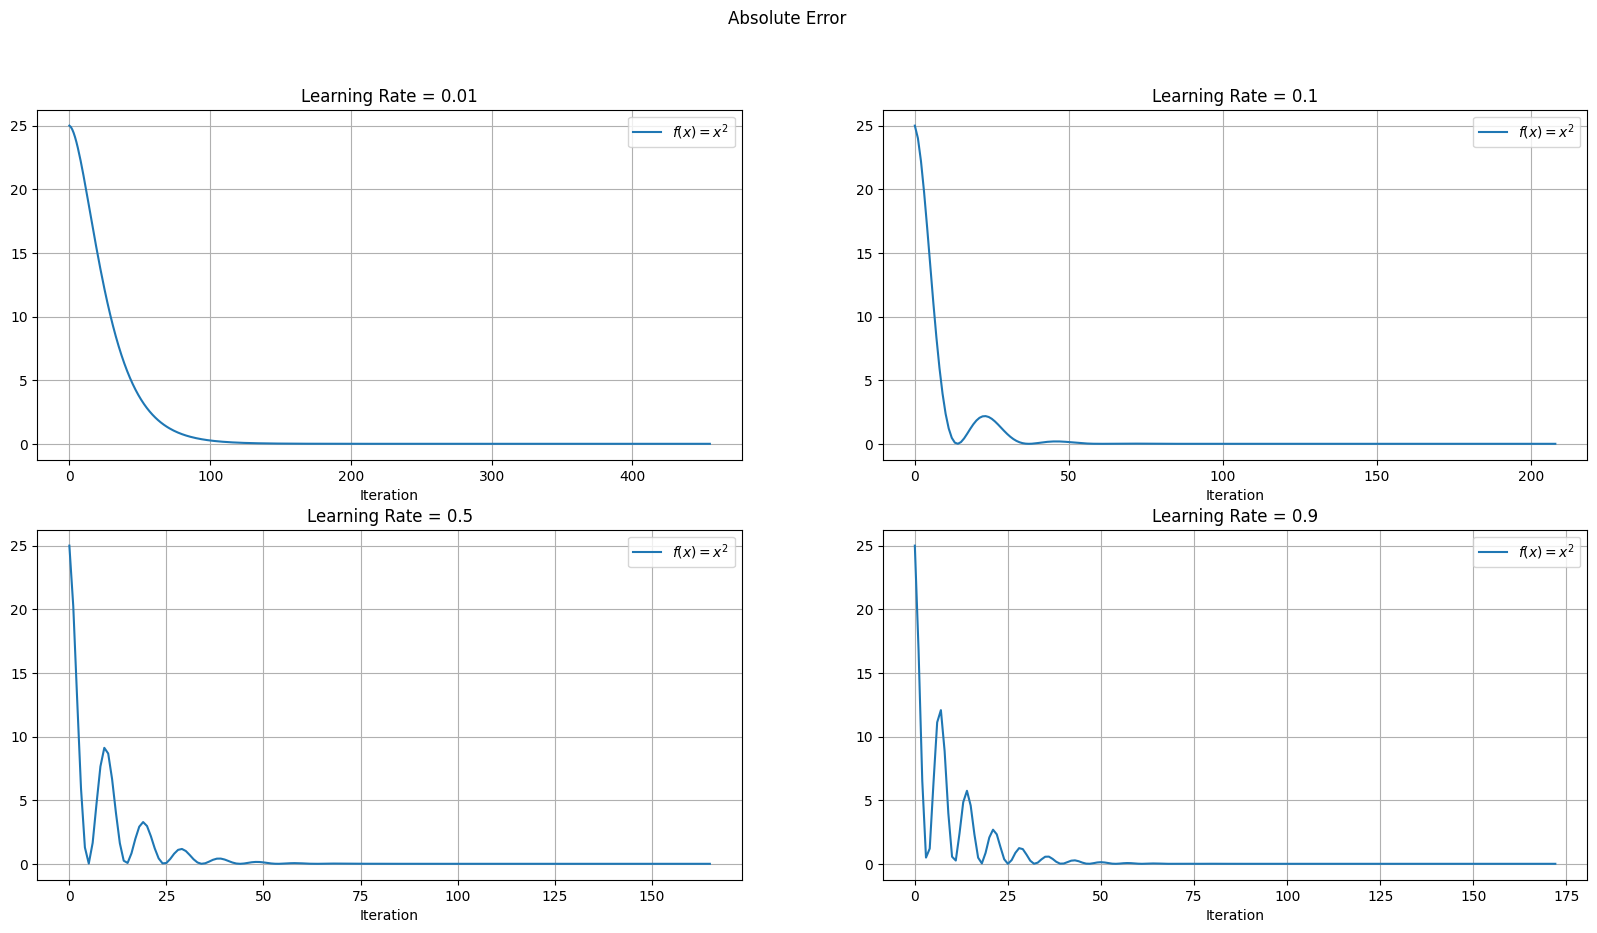

In [6]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Absolute Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X, cost = optimizer.optimize(F_1D,GradF_1D,X0)
    path_x = np.array( [q for q,j in cost] )
    path_y = np.array( [j for q,j in cost] )
    axs[ int(q/2), q % 2].plot(path_y, label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")


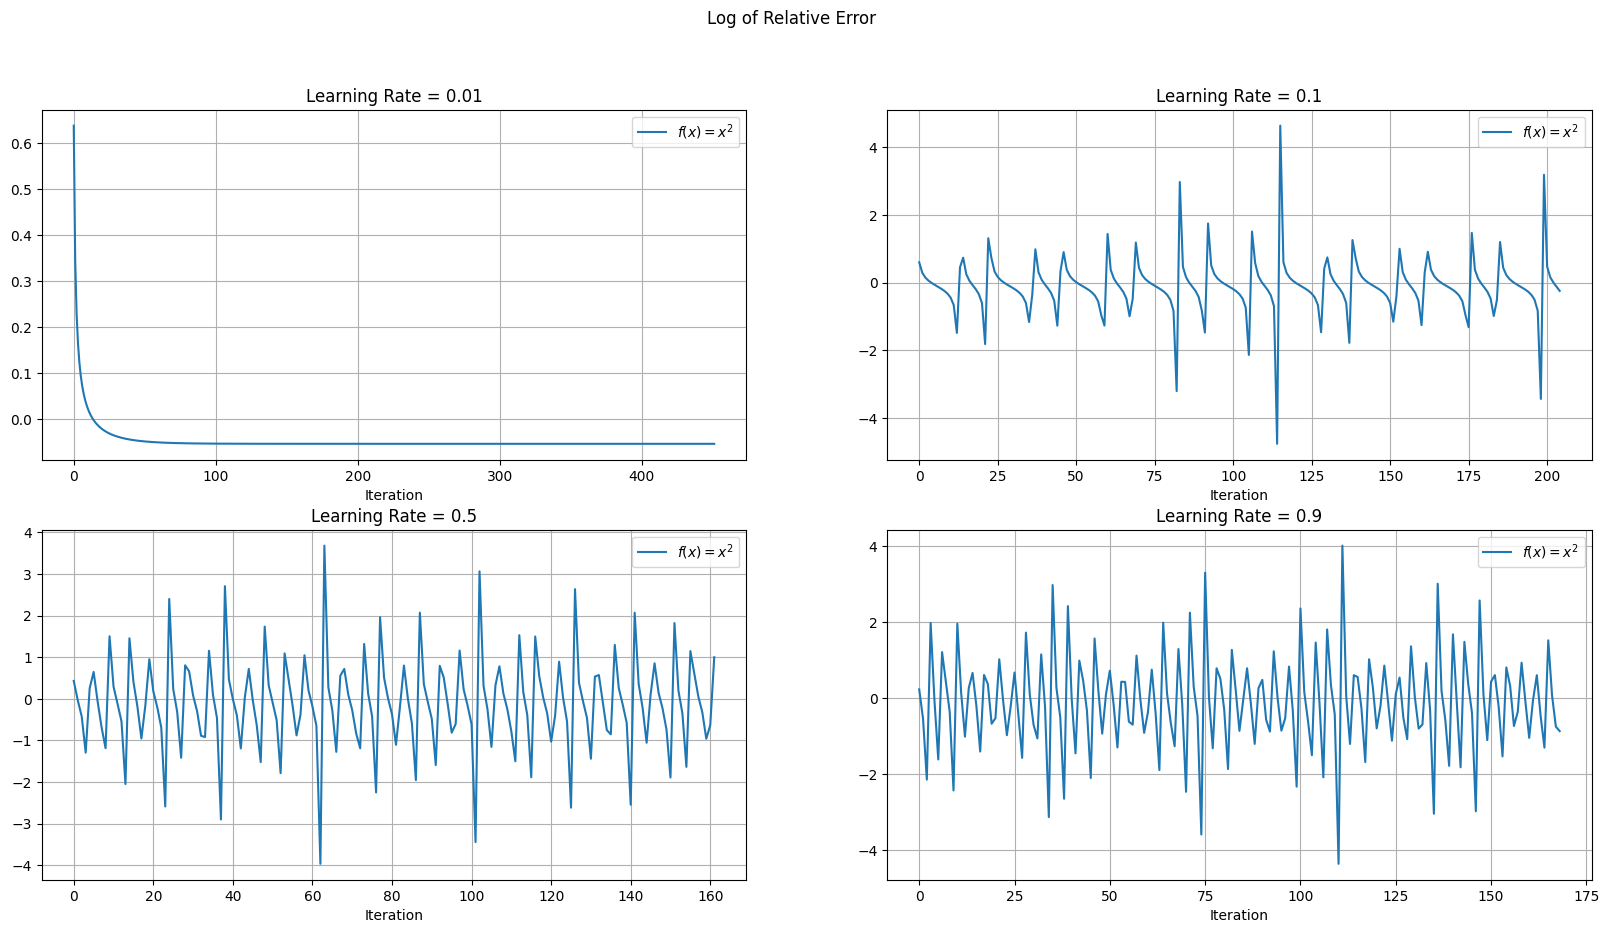

In [7]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Log of Relative Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X, cost = optimizer.optimize(F_1D,GradF_1D,X0)
    path_x = np.array( [q for q,j in cost] )
    path_y = np.array( [j for q,j in cost] )
    eps = np.abs(path_y[1:-1] - path_y[0:-2])
    rate = eps[1:-1] / eps[:-2]
    axs[ int(q/2), q % 2].plot( np.log(rate), label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

b.) $$ f(x,y) = x^2 + y^2 $$

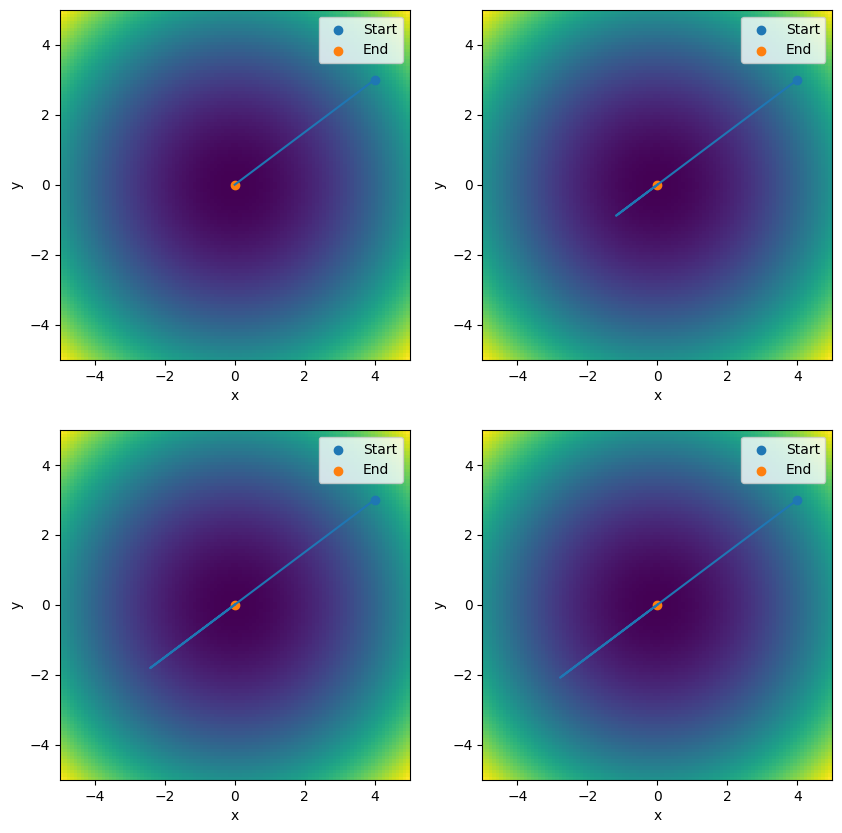

In [8]:
X0 = [4.0, 3.0]

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5 ,100)
X , Y = np.meshgrid(x,y)
y = F_2D(X0)

fig, axs = plt.subplots(2,2,figsize=(10, 10))
for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X_, cost = optimizer.optimize(F_2D,GradF_2D,X0)
    path_x = np.array( [q[0] for q,j in cost] )
    path_y = np.array( [q[1] for q,j in cost] )
    path_z = np.array( [ j   for q,j in cost] )
    axs[ int(q/2), q % 2].imshow( F_2D((X,Y)) , extent=[-5, 5, -5, 5], origin='lower', cmap='viridis')
    axs[ int(q/2), q % 2].scatter(path_x[0] , path_y[0] , label = "Start")
    axs[ int(q/2), q % 2].scatter(path_x[-1] , path_y[-1] , label = "End")
    axs[ int(q/2), q % 2].plot(path_x , path_y)
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].set_xlabel("x")
    axs[ int(q/2), q % 2].set_ylabel("y")

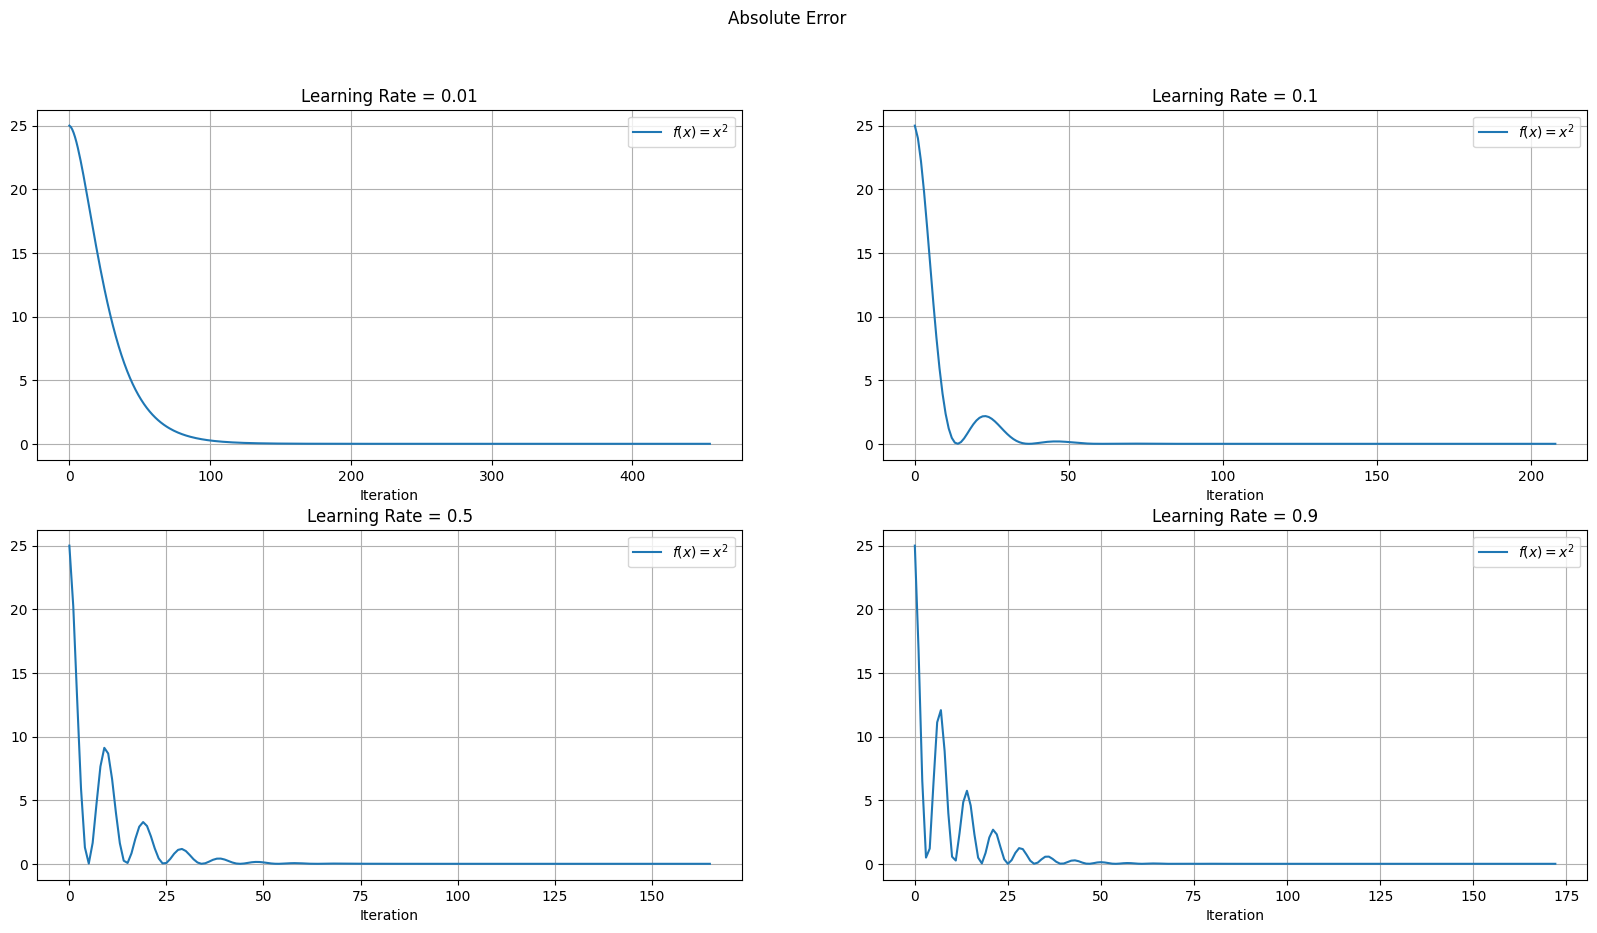

In [9]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Absolute Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X_, cost = optimizer.optimize(F_2D,GradF_2D,X0)
    path_x = np.array( [q[0] for q,j in cost] )
    path_y = np.array( [q[1] for q,j in cost] )
    path_z = np.array( [ j   for q,j in cost] )
    axs[ int(q/2), q % 2].plot(path_z, label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

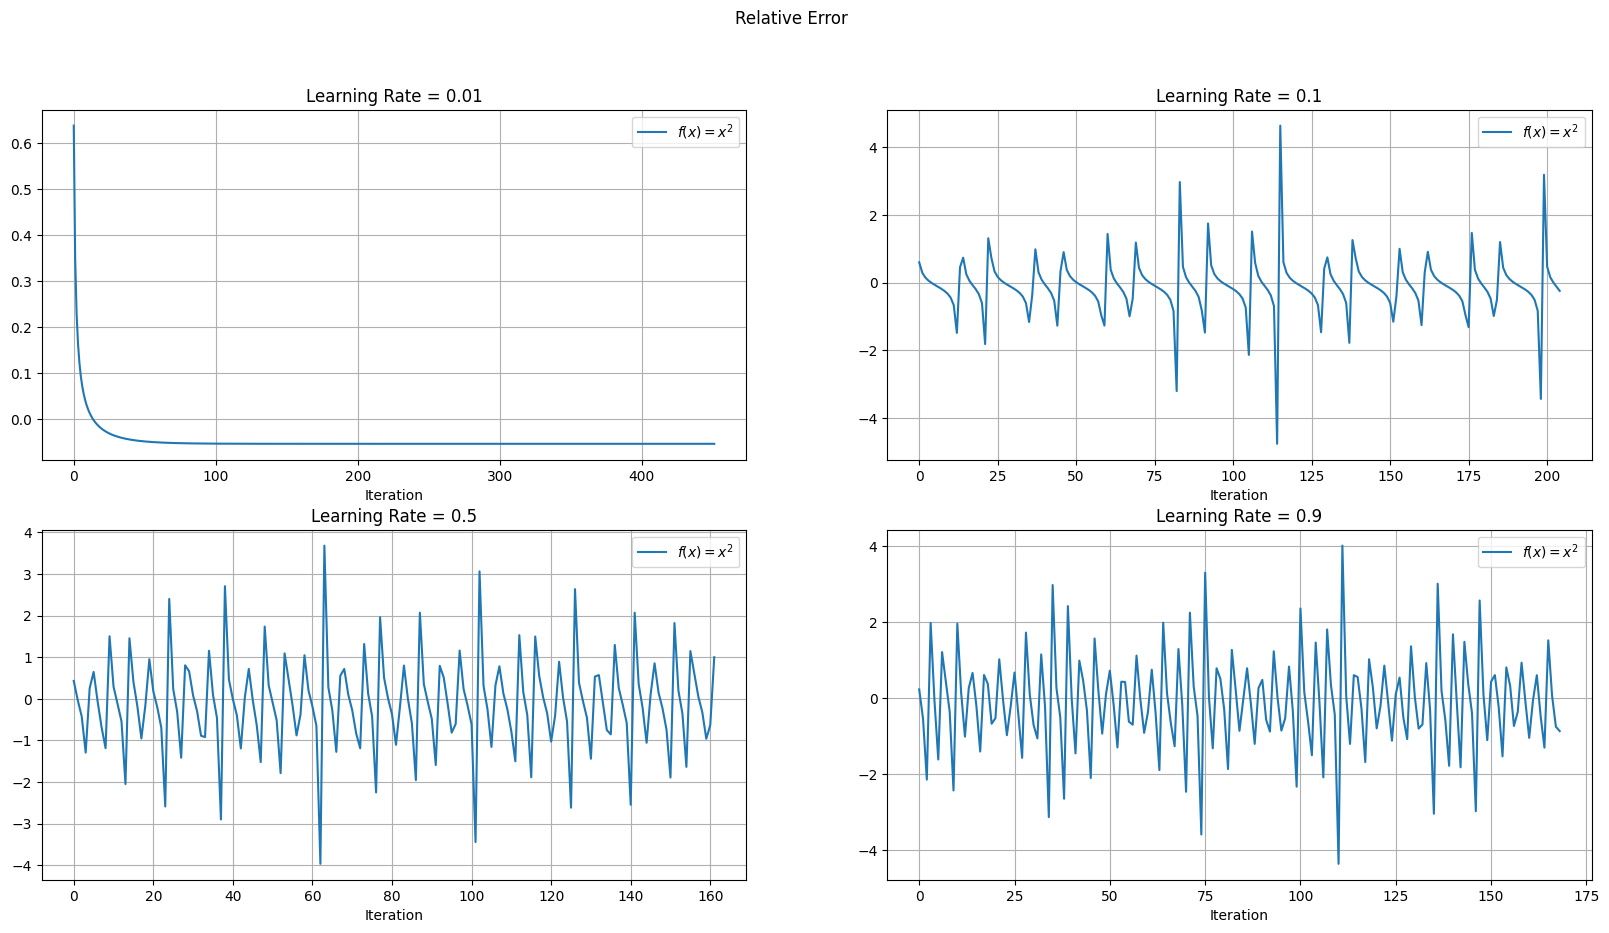

In [10]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Relative Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X_, cost = optimizer.optimize(F_2D,GradF_2D,X0)
    path_x = np.array( [q[0] for q,j in cost] )
    path_y = np.array( [q[1] for q,j in cost] )
    path_z = np.array( [ j   for q,j in cost] )
    eps = np.abs(path_z[1:-1] - path_z[0:-2])
    rate = eps[1:-1] / eps[:-2]
    axs[ int(q/2), q % 2].plot( np.log(rate), label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

## Nesterov Accelerated Gradient

$$v_t = \beta v_{t-1} + \nabla J(\theta_t - \alpha \beta v_{t-1})$$
     
$$\theta_{t+1} = \theta_t - \alpha v_t$$

a.) $$ f(x) = x^2 $$

In [11]:
alpha = [0.01 , .1 , .5 , .9]
model = NAG

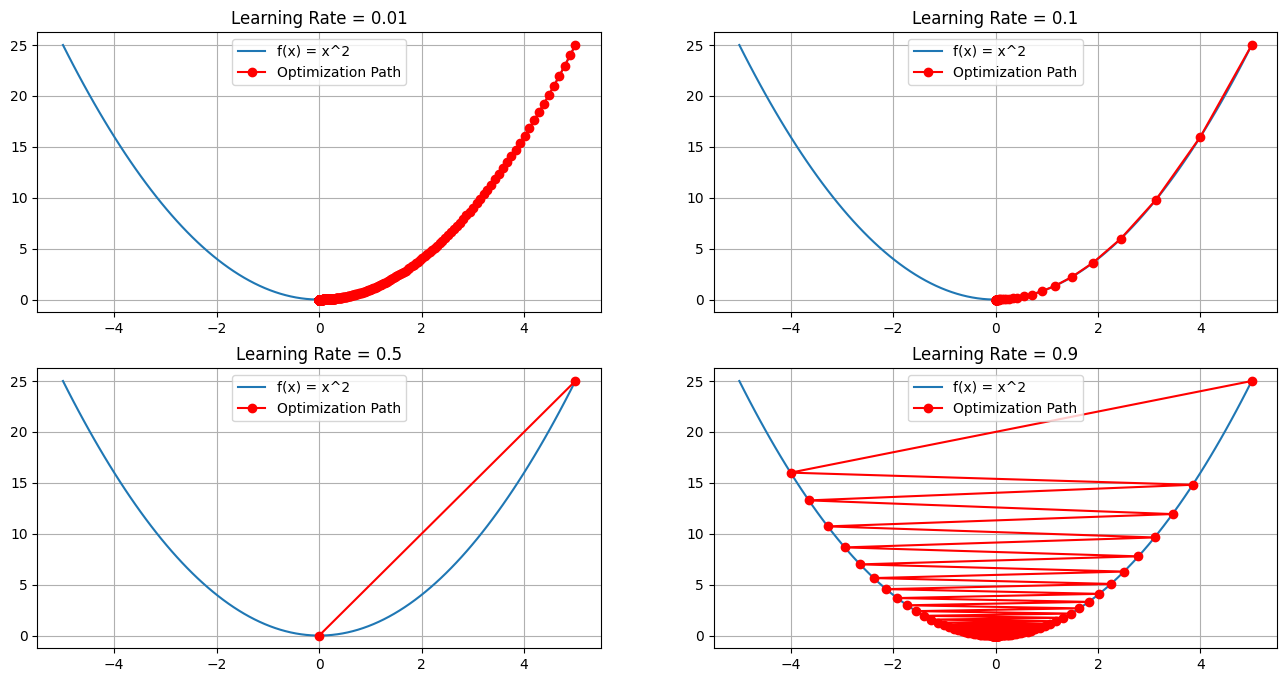

In [12]:
x = np.linspace(-5, 5, 100)
y = F_1D(x)
X0 = 5.0

fig, axs = plt.subplots(2,2,figsize=(16, 8))
for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q] , beta=.09)
    X, cost = optimizer.optimize(F_1D,GradF_1D,X0)
    path_x = np.array( [q for q,j in cost] )
    path_y = np.array( [j for q,j in cost] )
    axs[ int(q/2), q % 2].plot(x, y , label="f(x) = x^2")
    axs[ int(q/2), q % 2].plot(path_x, path_y , "ro-" , label="Optimization Path")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)

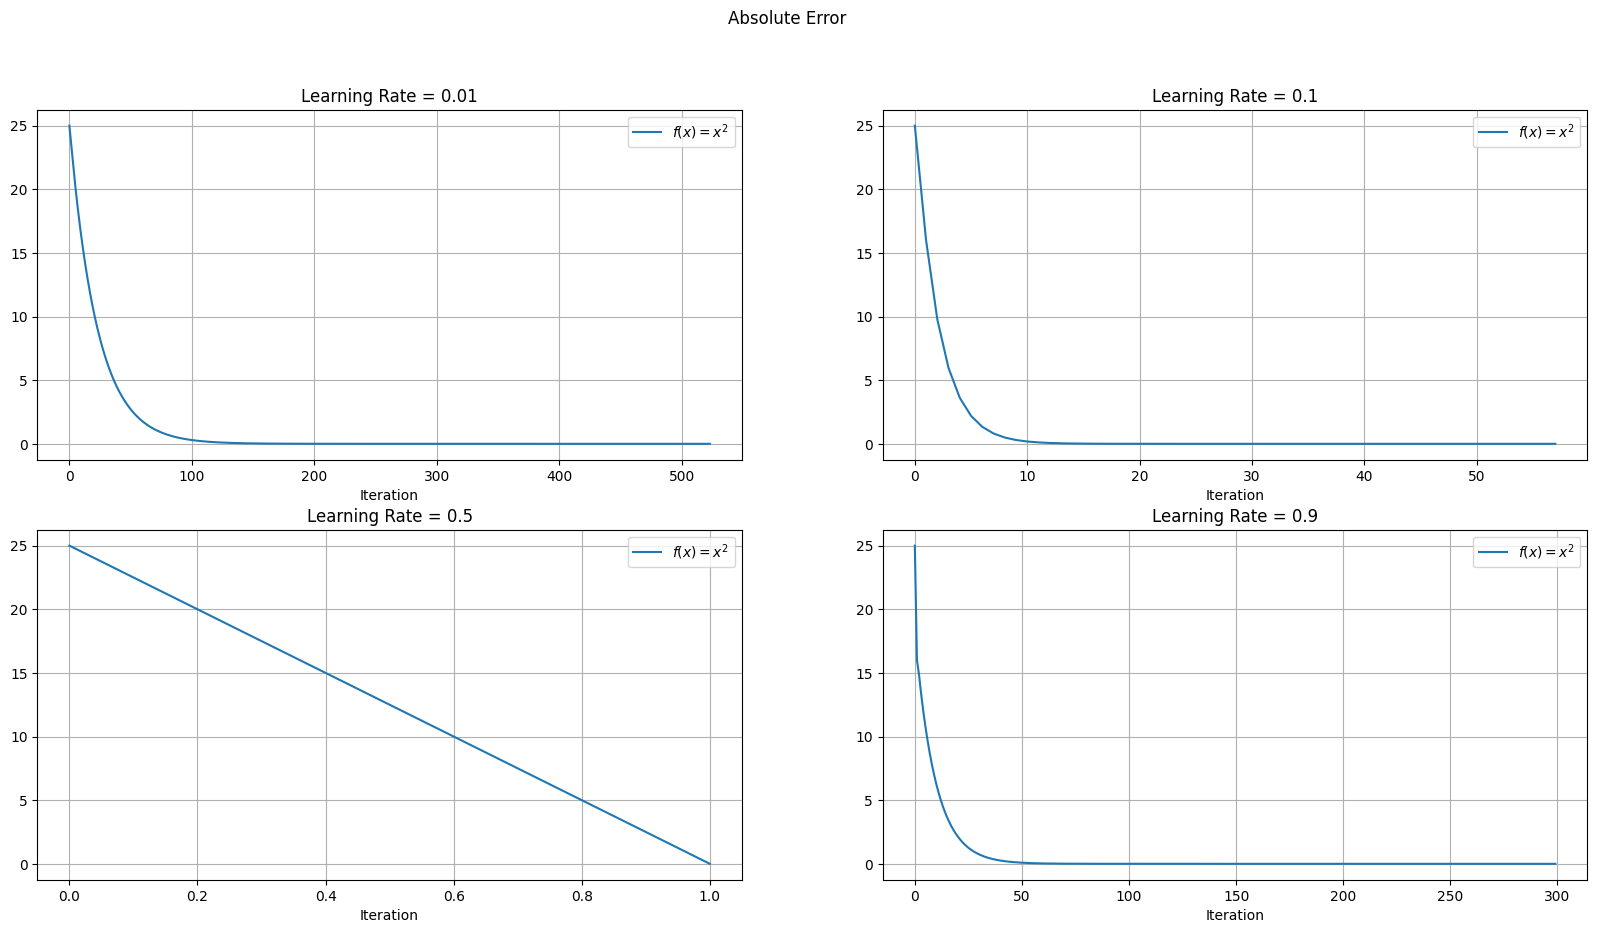

In [13]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Absolute Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X, cost = optimizer.optimize(F_1D,GradF_1D,X0)
    path_x = np.array( [q for q,j in cost] )
    path_y = np.array( [j for q,j in cost] )
    axs[ int(q/2), q % 2].plot(path_y, label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

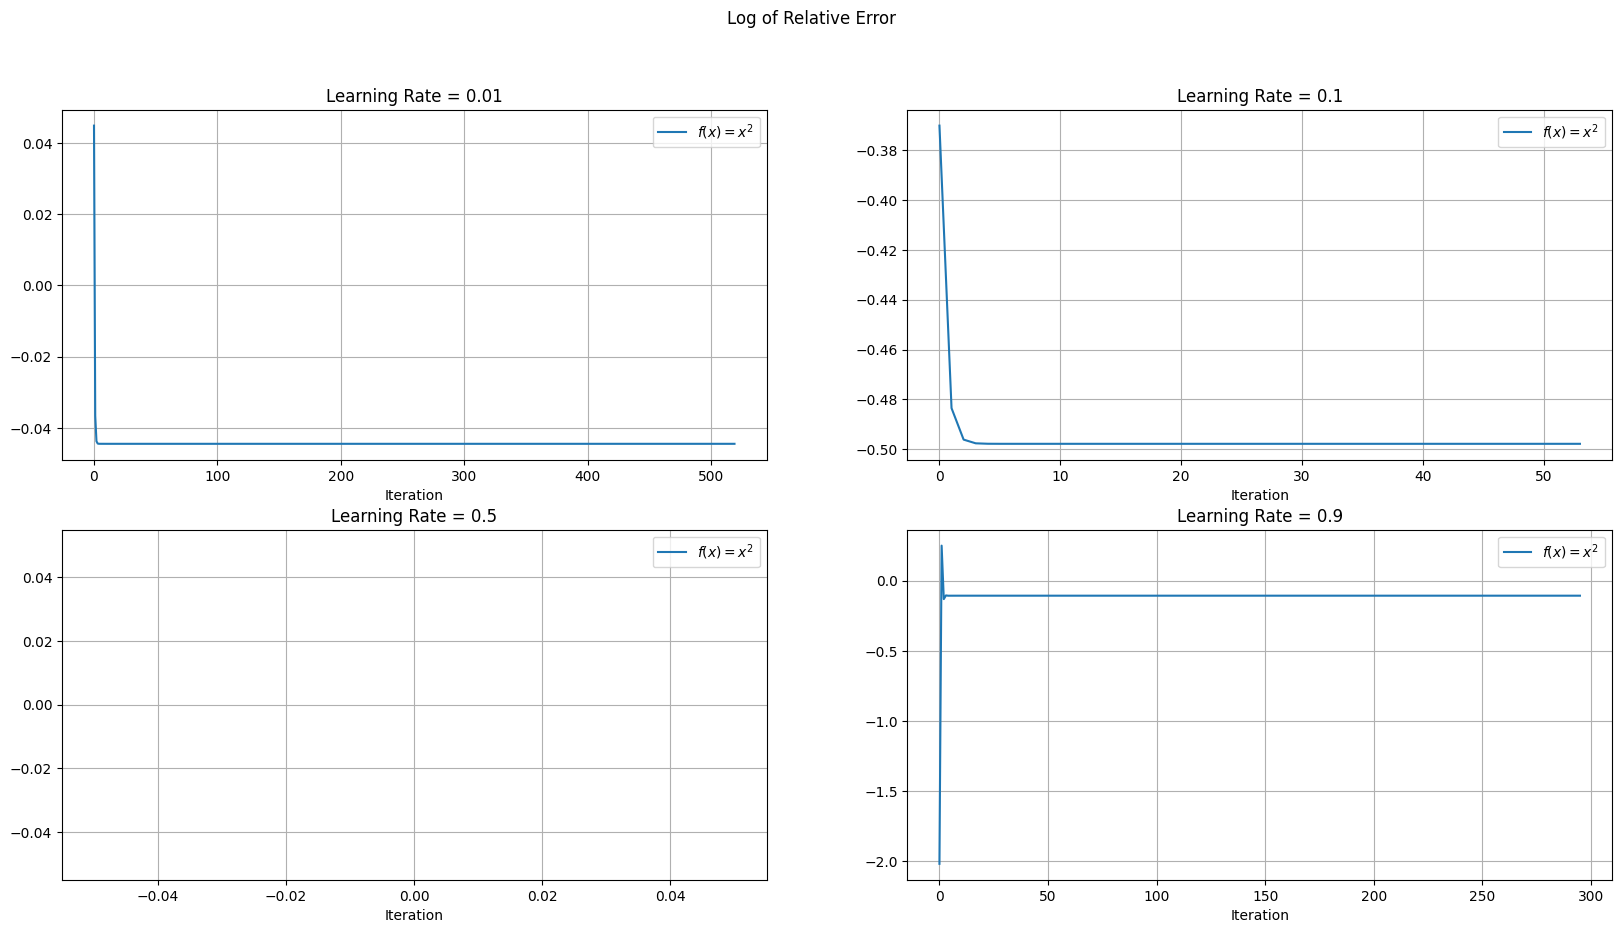

In [14]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Log of Relative Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X, cost = optimizer.optimize(F_1D,GradF_1D,X0)
    path_x = np.array( [q for q,j in cost] )
    path_y = np.array( [j for q,j in cost] )
    eps = np.abs(path_y[1:-1] - path_y[0:-2])
    rate = eps[1:-1] / eps[:-2]
    axs[ int(q/2), q % 2].plot( np.log(rate), label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

b.) $$ f(x,y) = x^2 + y^2 $$

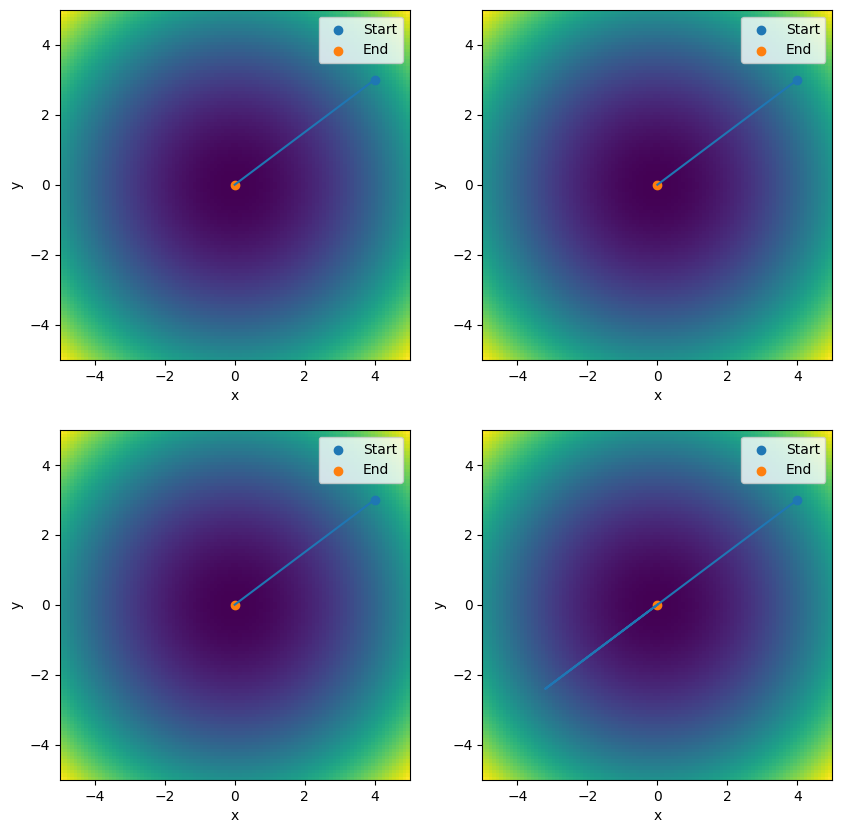

In [15]:
X0 = [4.0, 3.0]

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5 ,100)
X , Y = np.meshgrid(x,y)
y = F_2D(X0)

fig, axs = plt.subplots(2,2,figsize=(10, 10))
for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X_, cost = optimizer.optimize(F_2D,GradF_2D,X0)
    path_x = np.array( [q[0] for q,j in cost] )
    path_y = np.array( [q[1] for q,j in cost] )
    path_z = np.array( [ j   for q,j in cost] )
    axs[ int(q/2), q % 2].imshow( F_2D((X,Y)) , extent=[-5, 5, -5, 5], origin='lower', cmap='viridis')
    axs[ int(q/2), q % 2].scatter(path_x[0] , path_y[0] , label = "Start")
    axs[ int(q/2), q % 2].scatter(path_x[-1] , path_y[-1] , label = "End")
    axs[ int(q/2), q % 2].plot(path_x , path_y)
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].set_xlabel("x")
    axs[ int(q/2), q % 2].set_ylabel("y")

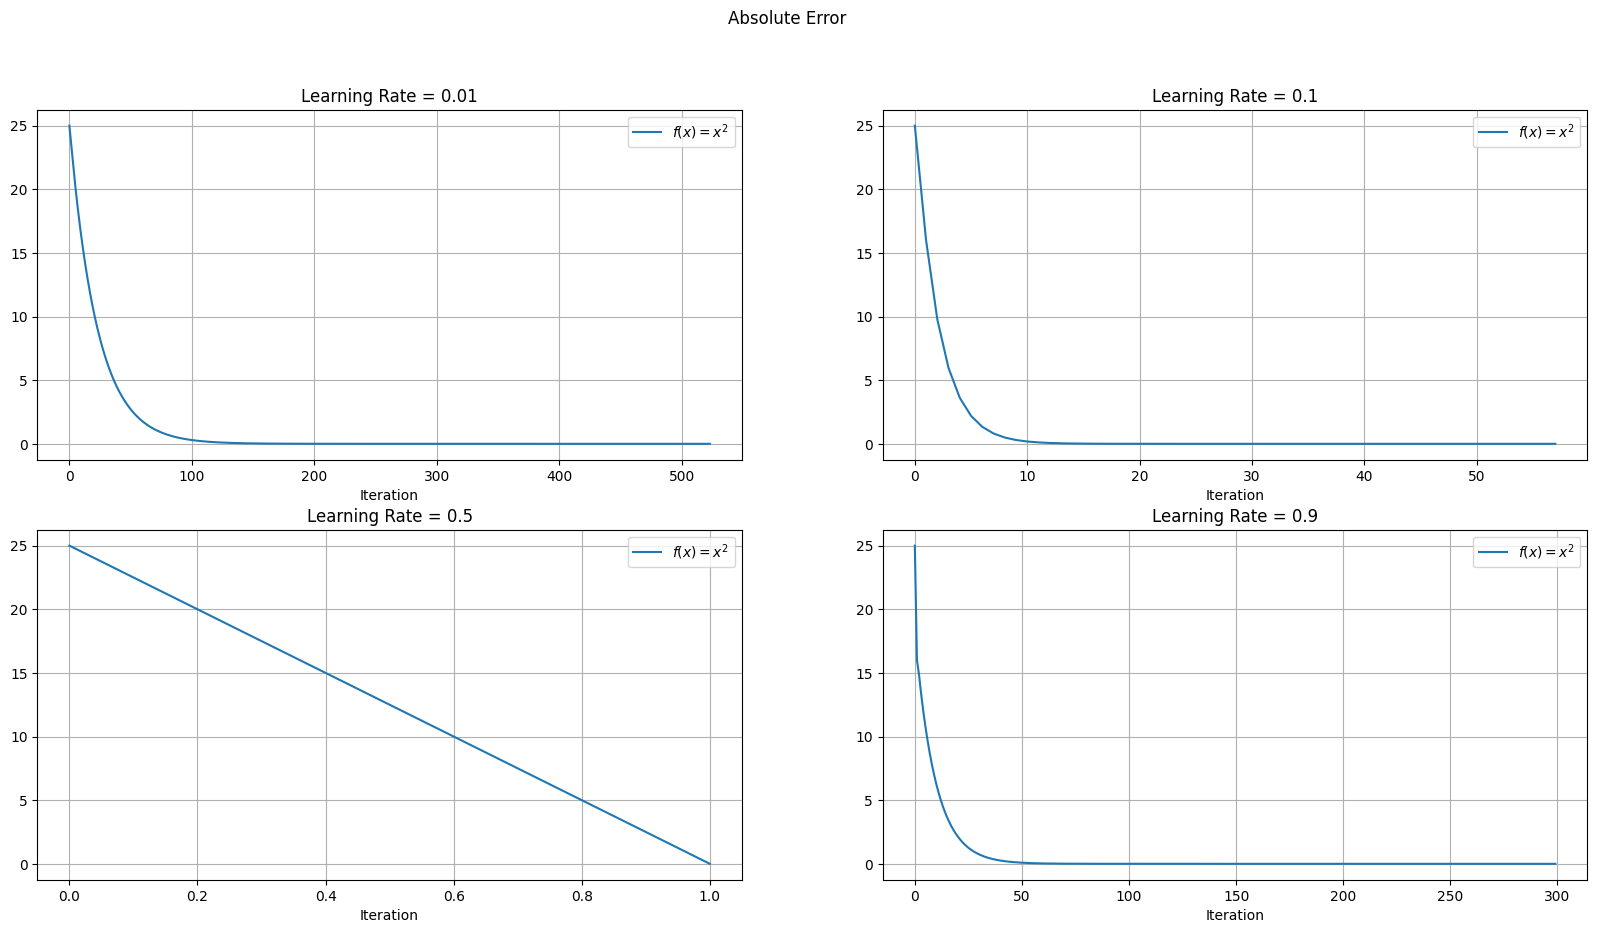

In [16]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Absolute Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X_, cost = optimizer.optimize(F_2D,GradF_2D,X0)
    path_x = np.array( [q[0] for q,j in cost] )
    path_y = np.array( [q[1] for q,j in cost] )
    path_z = np.array( [ j   for q,j in cost] )
    axs[ int(q/2), q % 2].plot(path_z, label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

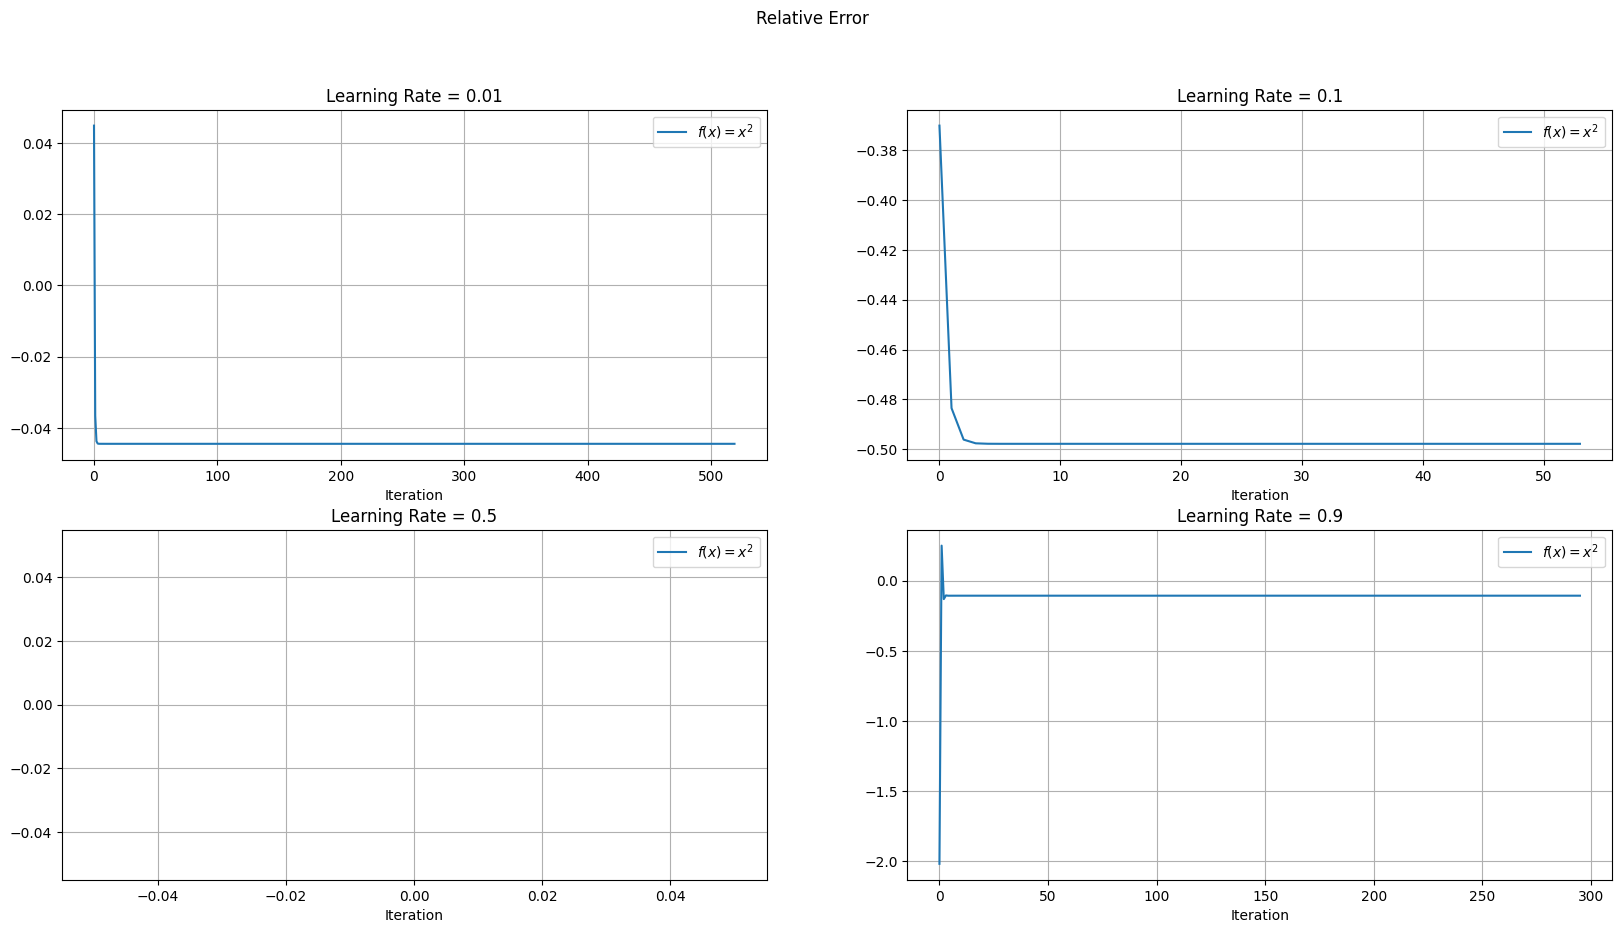

In [17]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Relative Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X_, cost = optimizer.optimize(F_2D,GradF_2D,X0)
    path_x = np.array( [q[0] for q,j in cost] )
    path_y = np.array( [q[1] for q,j in cost] )
    path_z = np.array( [ j   for q,j in cost] )
    eps = np.abs(path_z[1:-1] - path_z[0:-2])
    rate = eps[1:-1] / eps[:-2]
    axs[ int(q/2), q % 2].plot( np.log(rate), label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

## Adaptive Gradient

$$G_t = G_{t-1} + (\nabla J(\theta_t))^2$$
     
$$\theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{G_t + \epsilon}} \odot \nabla J(\theta_t)$$

a.) $$ f(x) = x^2 $$

In [18]:
alpha = [0.01 , .1 , .5 , .9]
model = ADG

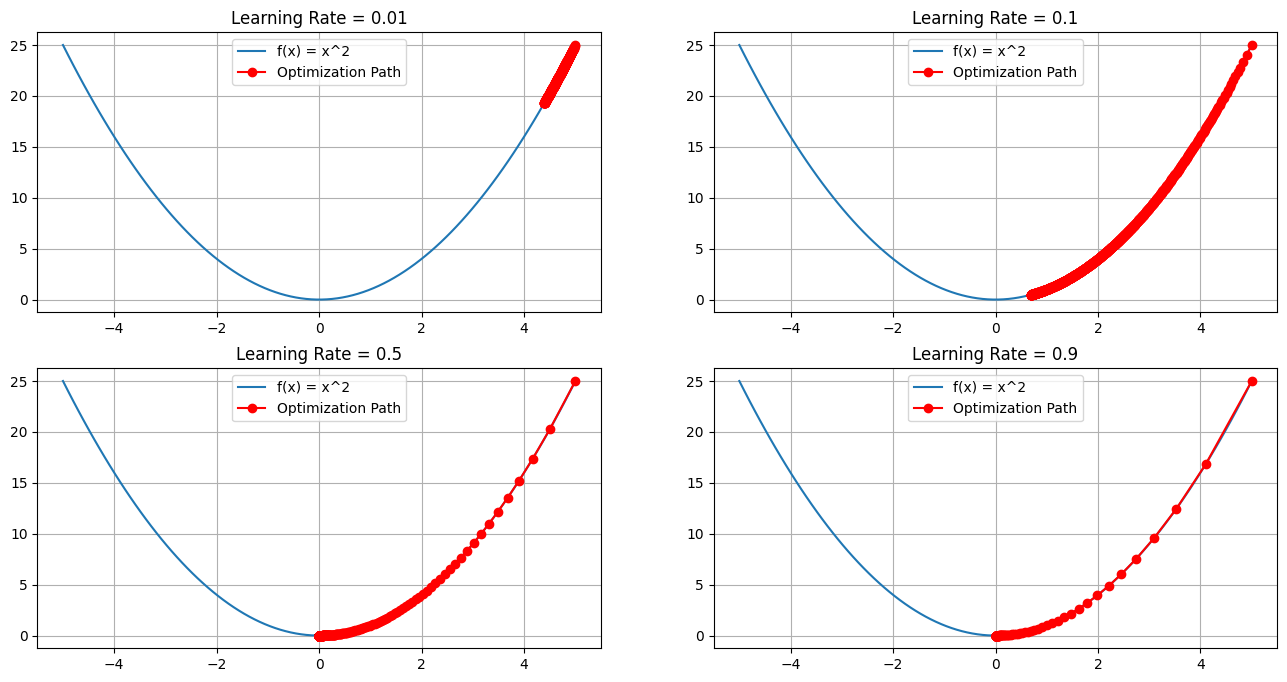

In [19]:
x = np.linspace(-5, 5, 100)
y = F_1D(x)
X0 = 5.0

fig, axs = plt.subplots(2,2,figsize=(16, 8))
for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X, cost = optimizer.optimize(F_1D,GradF_1D,X0)
    path_x = np.array( [q for q,j in cost] )
    path_y = np.array( [j for q,j in cost] )
    axs[ int(q/2), q % 2].plot(x, y , label="f(x) = x^2")
    axs[ int(q/2), q % 2].plot(path_x, path_y , "ro-" , label="Optimization Path")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)

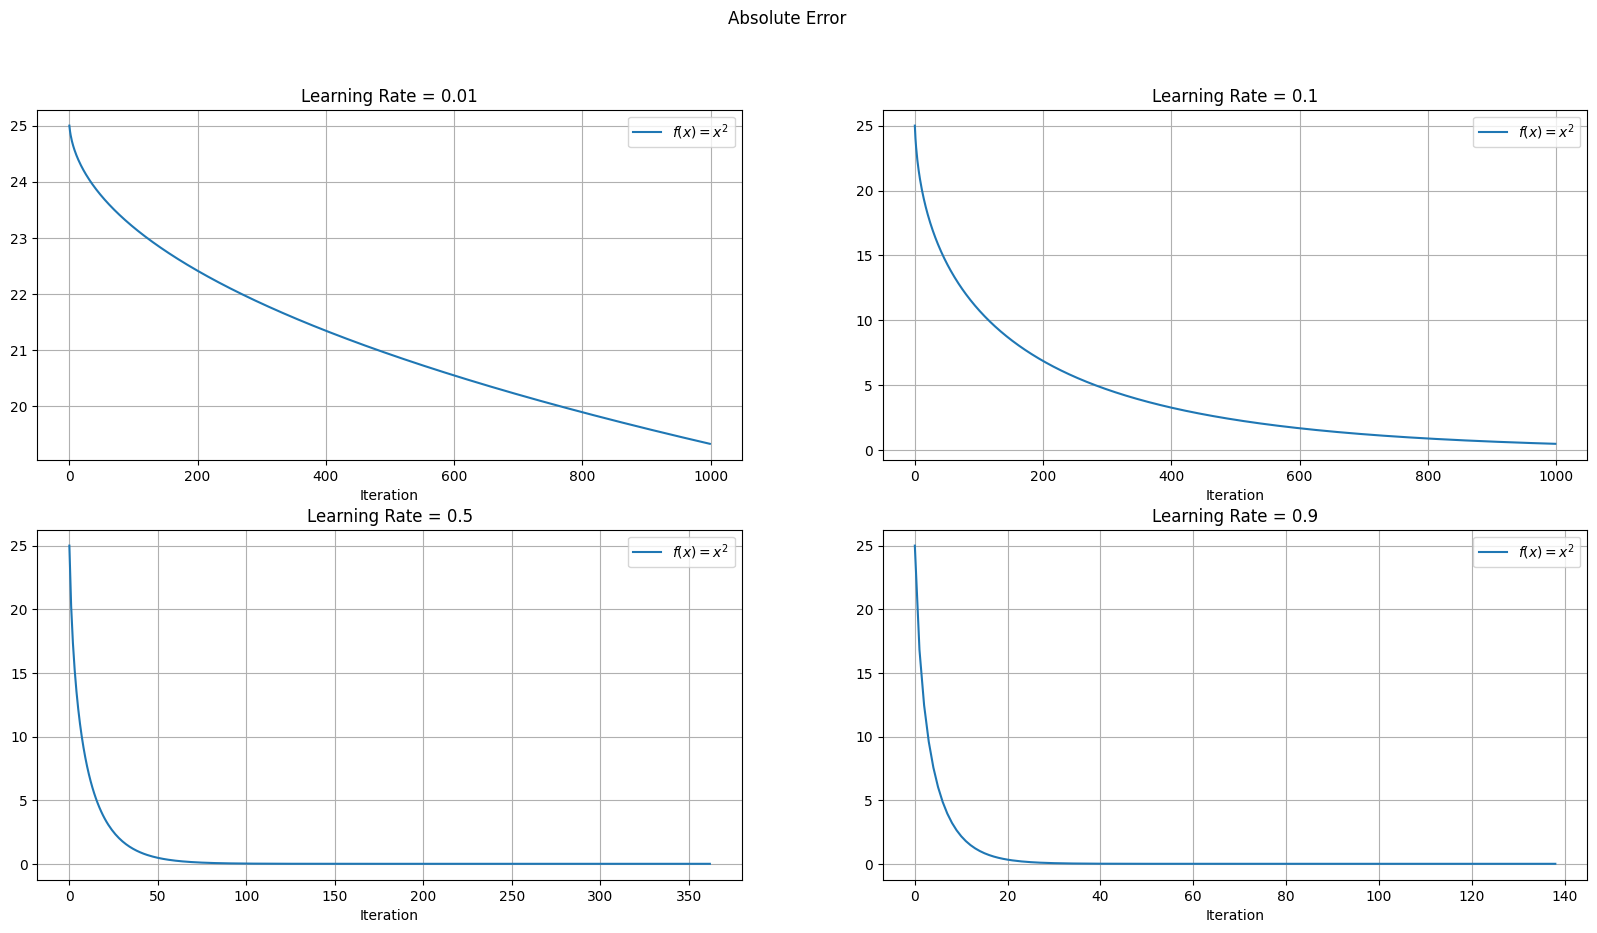

In [20]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Absolute Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X, cost = optimizer.optimize(F_1D,GradF_1D,X0)
    path_x = np.array( [q for q,j in cost] )
    path_y = np.array( [j for q,j in cost] )
    axs[ int(q/2), q % 2].plot(path_y, label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

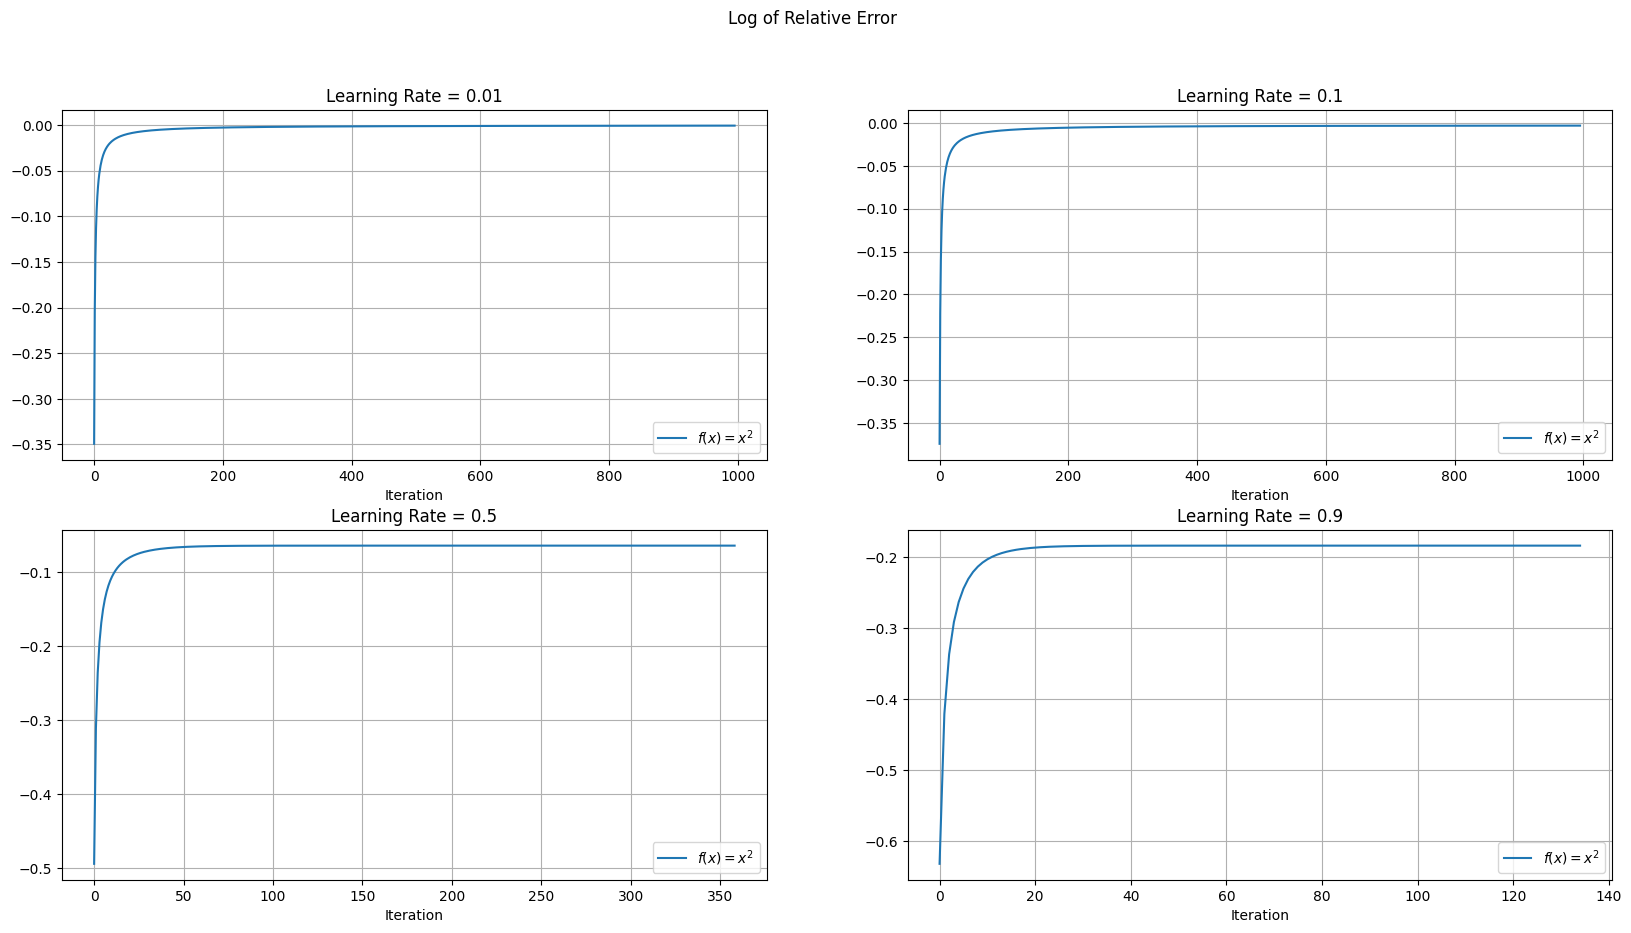

In [21]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Log of Relative Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X, cost = optimizer.optimize(F_1D,GradF_1D,X0)
    path_x = np.array( [q for q,j in cost] )
    path_y = np.array( [j for q,j in cost] )
    eps = np.abs(path_y[1:-1] - path_y[0:-2])
    rate = eps[1:-1] / eps[:-2]
    axs[ int(q/2), q % 2].plot( np.log(rate), label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

b.) $$ f(x,y) = x^2 + y^2 $$

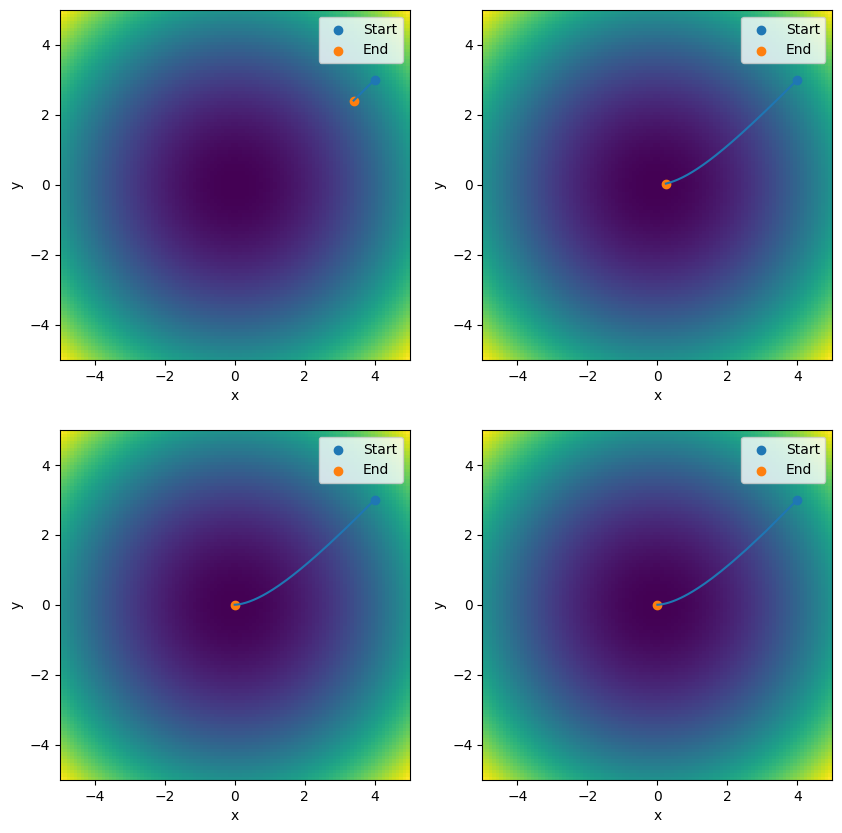

In [22]:
X0 = [4.0, 3.0]

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5 ,100)
X , Y = np.meshgrid(x,y)
y = F_2D(X0)

fig, axs = plt.subplots(2,2,figsize=(10, 10))
for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X_, cost = optimizer.optimize(F_2D,GradF_2D,X0)
    path_x = np.array( [q[0] for q,j in cost] )
    path_y = np.array( [q[1] for q,j in cost] )
    path_z = np.array( [ j   for q,j in cost] )
    axs[ int(q/2), q % 2].imshow( F_2D((X,Y)) , extent=[-5, 5, -5, 5], origin='lower', cmap='viridis')
    axs[ int(q/2), q % 2].scatter(path_x[0] , path_y[0] , label = "Start")
    axs[ int(q/2), q % 2].scatter(path_x[-1] , path_y[-1] , label = "End")
    axs[ int(q/2), q % 2].plot(path_x , path_y)
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].set_xlabel("x")
    axs[ int(q/2), q % 2].set_ylabel("y")

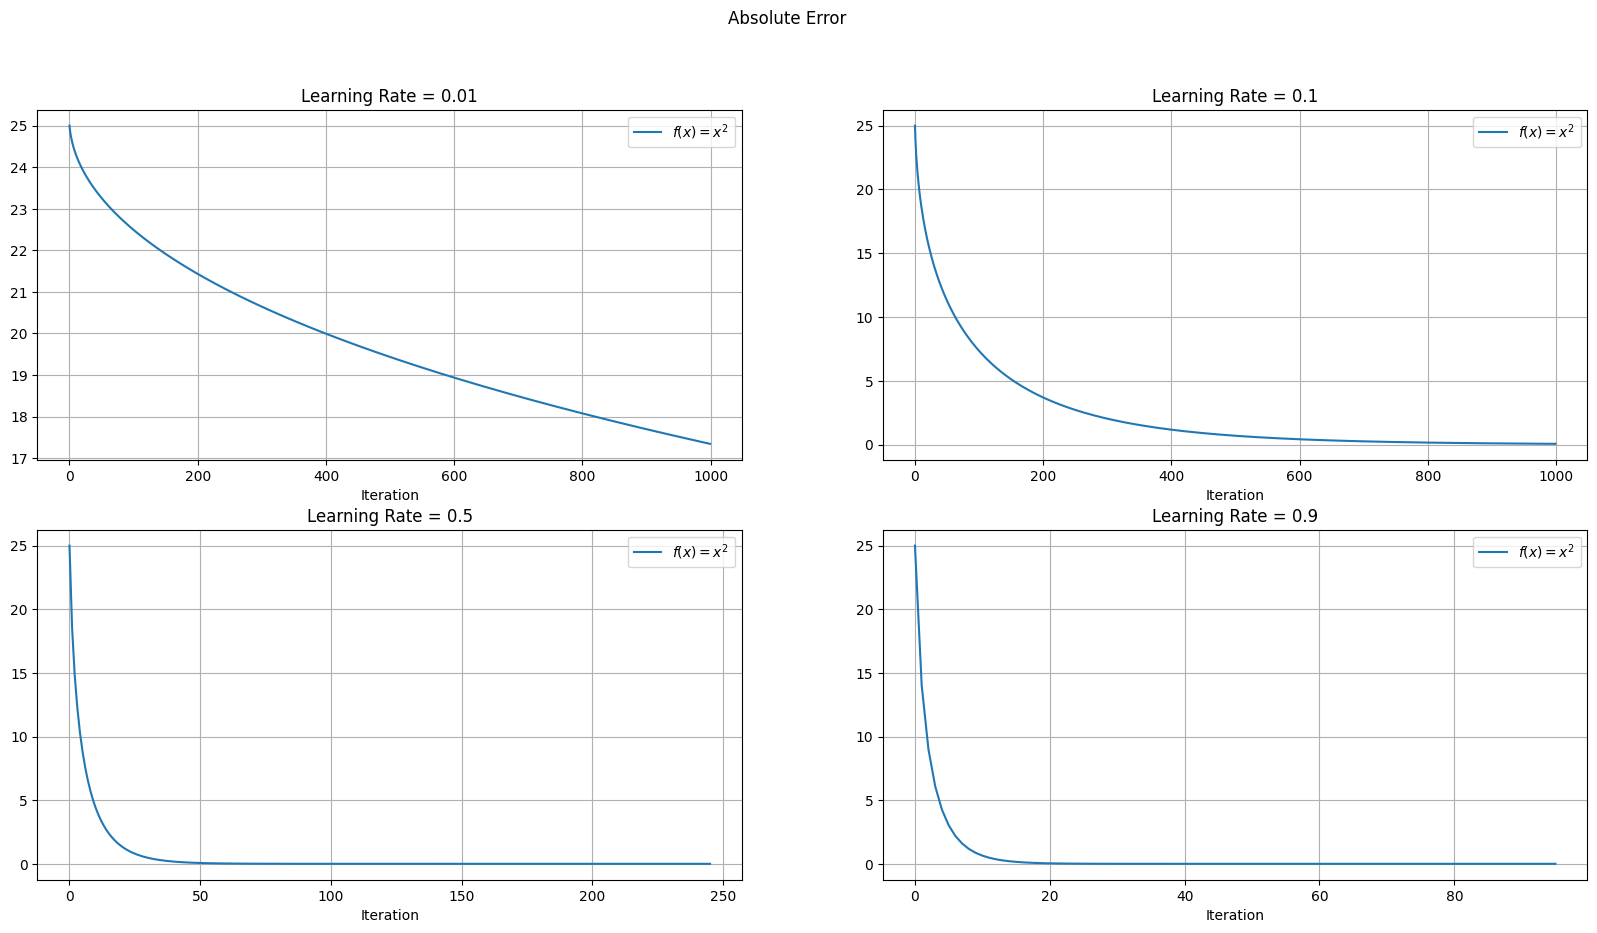

In [23]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Absolute Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X_, cost = optimizer.optimize(F_2D,GradF_2D,X0)
    path_x = np.array( [q[0] for q,j in cost] )
    path_y = np.array( [q[1] for q,j in cost] )
    path_z = np.array( [ j   for q,j in cost] )
    axs[ int(q/2), q % 2].plot(path_z, label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

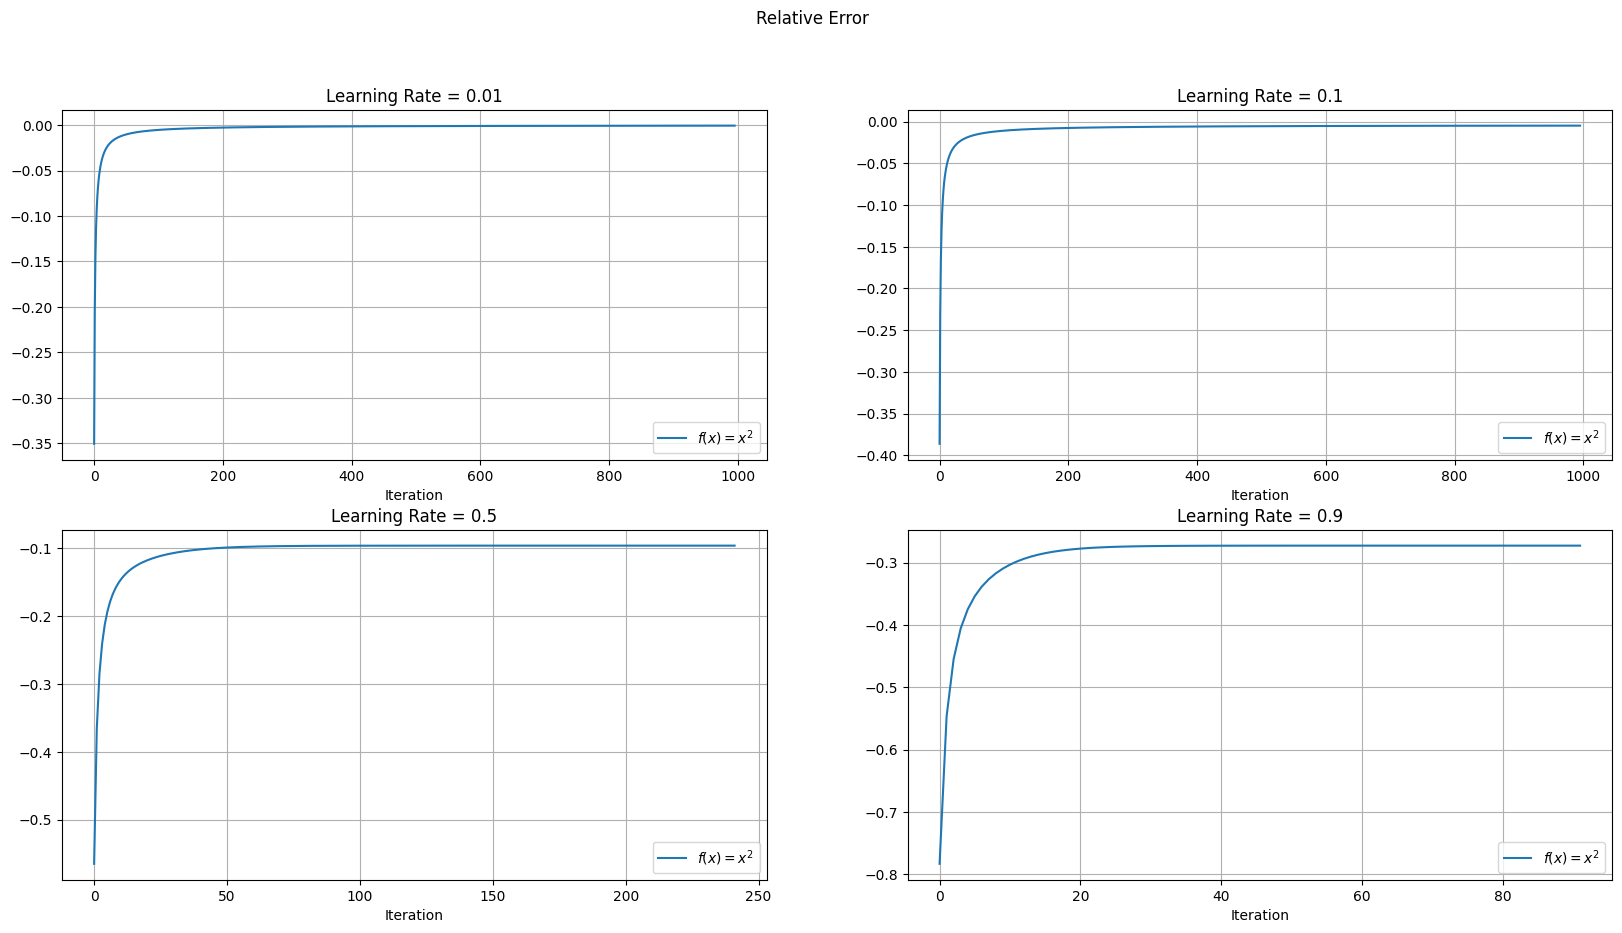

In [24]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Relative Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X_, cost = optimizer.optimize(F_2D,GradF_2D,X0)
    path_x = np.array( [q[0] for q,j in cost] )
    path_y = np.array( [q[1] for q,j in cost] )
    path_z = np.array( [ j   for q,j in cost] )
    eps = np.abs(path_z[1:-1] - path_z[0:-2])
    rate = eps[1:-1] / eps[:-2]
    axs[ int(q/2), q % 2].plot( np.log(rate), label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

## RMSprop

$$E(g^2)_t = \beta E(g^2)_{t-1} + (1-\beta)(\nabla J(\theta_t))^2$$

$$\theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{E(g^2)_t + \epsilon}} \odot \nabla J(\theta_t)$$

a.) $$ f(x) = x^2 $$

In [25]:
alpha = [0.01 , .1 , .5 , .9]
model = RMS

/home/lucas/Documentos/Masters/Machine Learning/assignment-3-advanced-optimization-methods-lucasschmidt98py/notebook/../src/optimizers.py:127: RuntimeWarning: invalid value encountered in sqrt
  new_X = X - self.alpha * np.array( GradF(X) ) / (np.sqrt(new_E + self.epsilon))


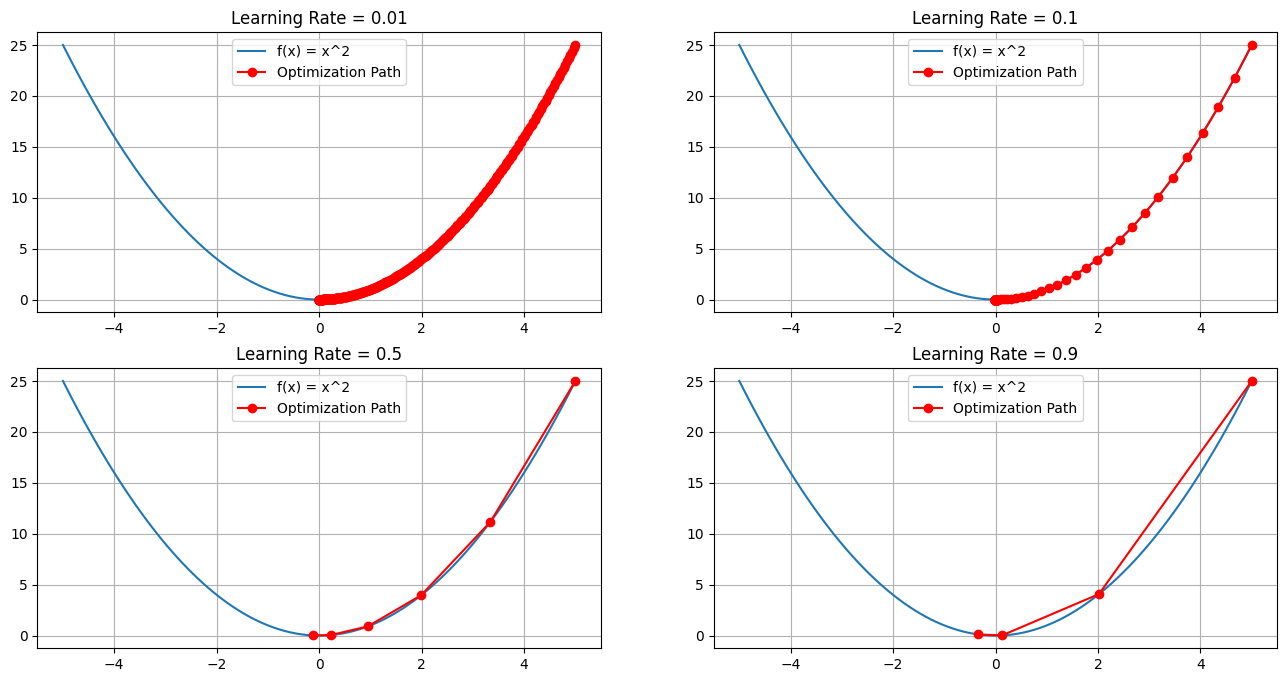

In [26]:
x = np.linspace(-5, 5, 100)
y = F_1D(x)
X0 = 5.0

fig, axs = plt.subplots(2,2,figsize=(16, 8))
for q in range(len(alpha)):
    optimizer = model(alpha=alpha[q] , beta=.09 , epsilon=0.01)
    X, cost = optimizer.optimize(F_1D,GradF_1D,X0)
    path_x = np.array( [q for q,j in cost] )
    path_y = np.array( [j for q,j in cost] )
    axs[ int(q/2), q % 2].plot(x, y , label="f(x) = x^2")
    axs[ int(q/2), q % 2].plot(path_x, path_y , "ro-" , label="Optimization Path")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)

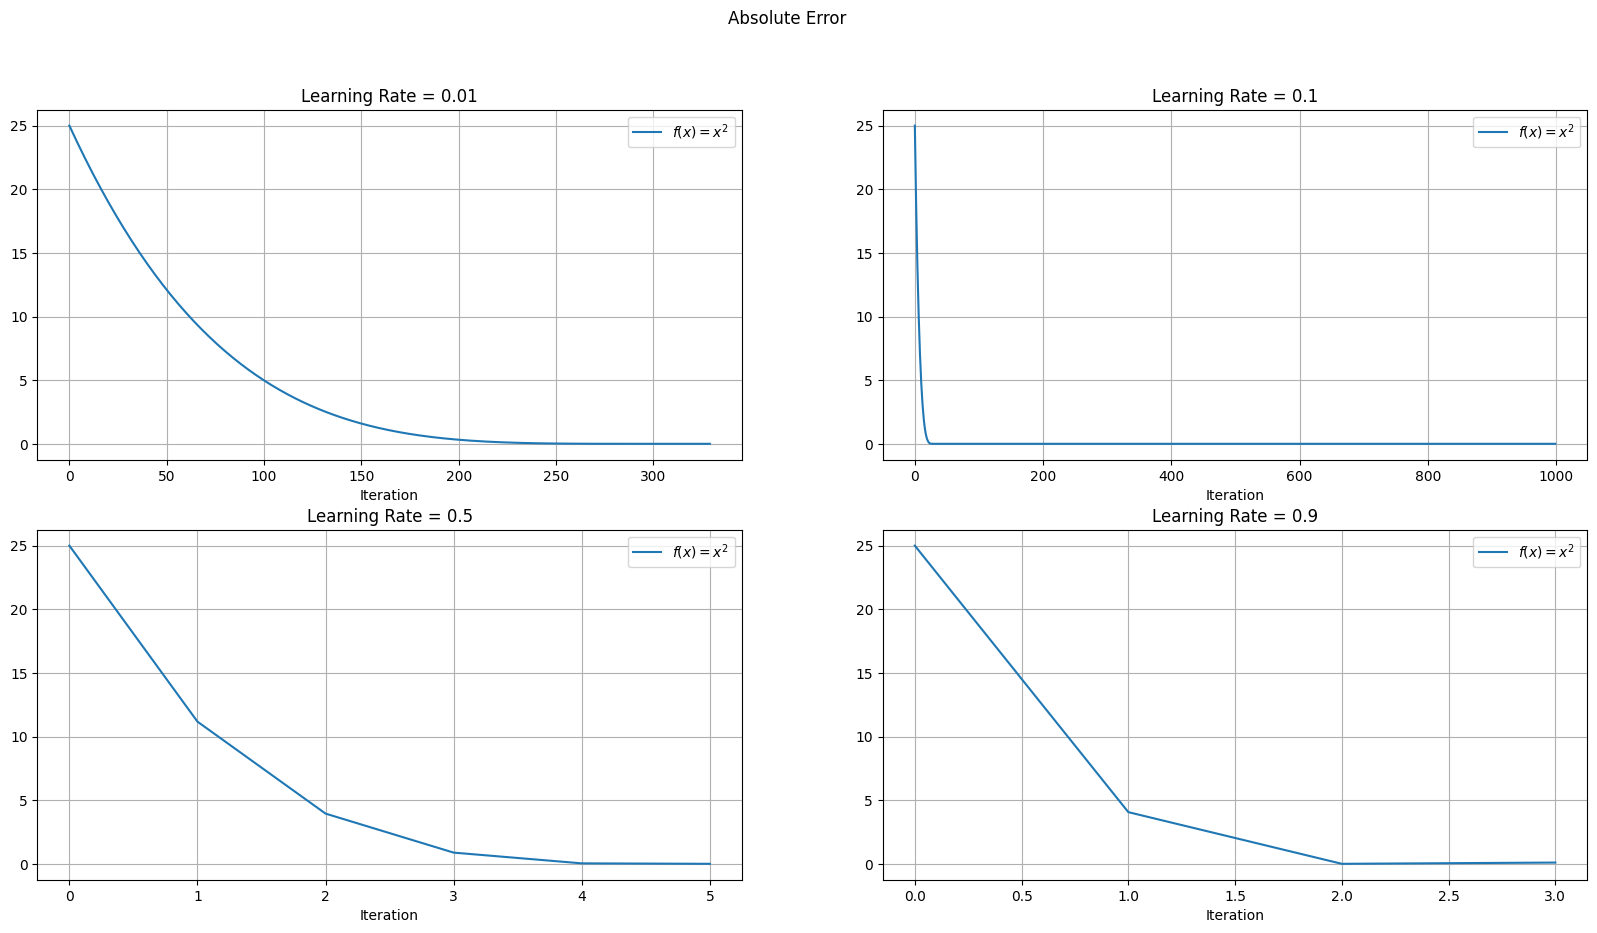

In [27]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Absolute Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q], beta=.09 , epsilon=0.01)
    X, cost = optimizer.optimize(F_1D,GradF_1D,X0)
    path_x = np.array( [q for q,j in cost] )
    path_y = np.array( [j for q,j in cost] )
    axs[ int(q/2), q % 2].plot(path_y, label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

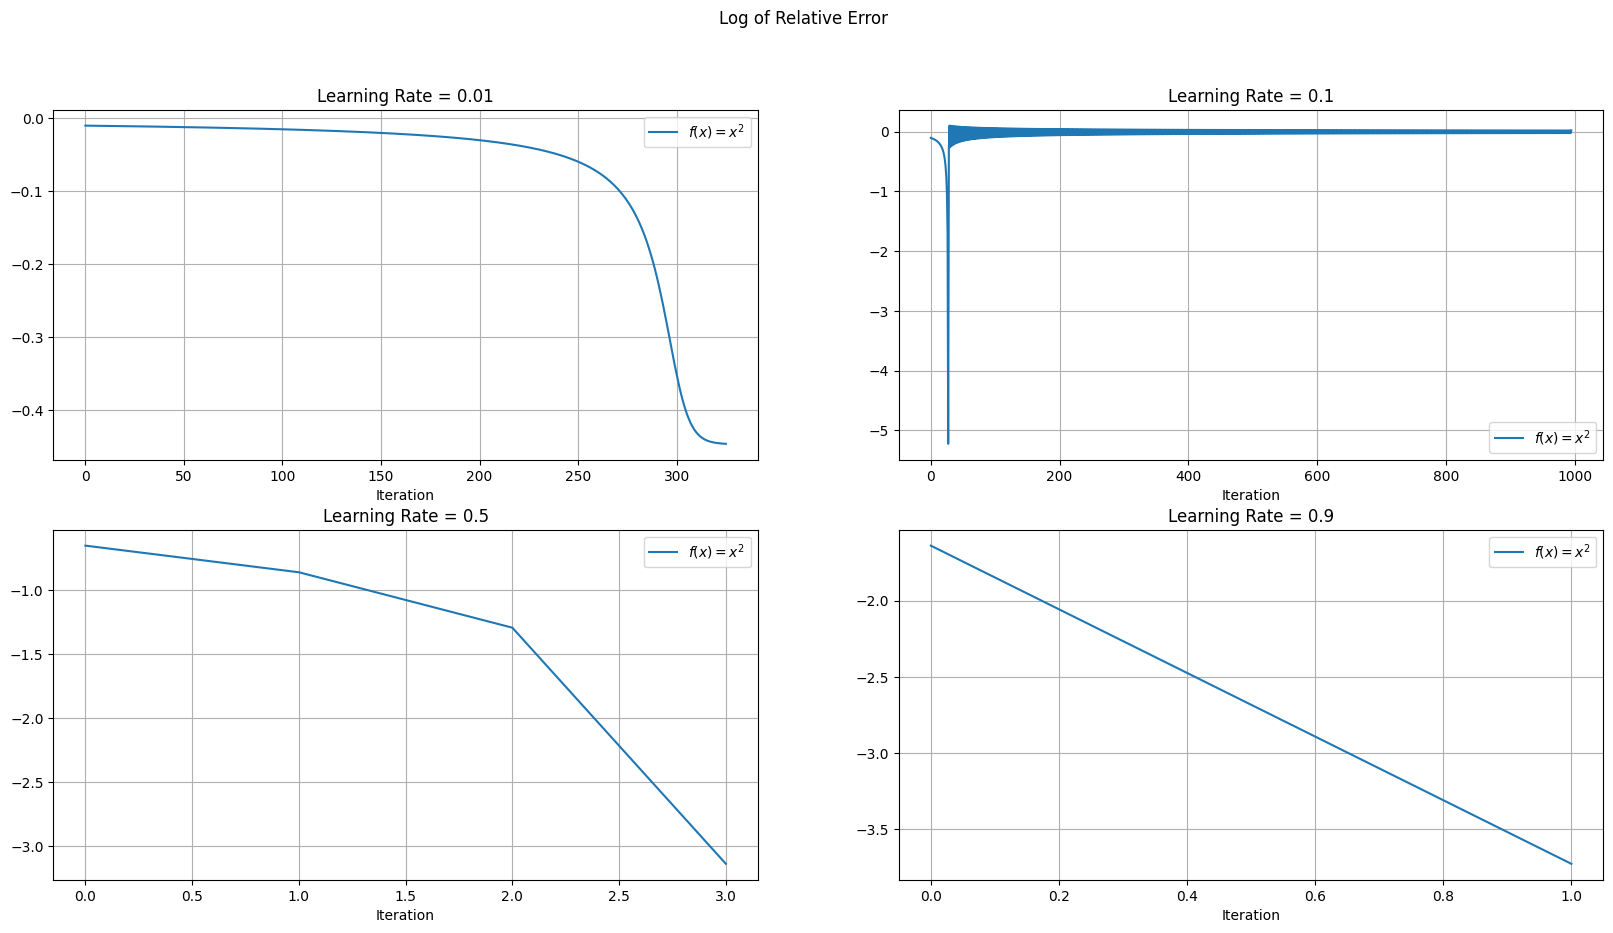

In [28]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Log of Relative Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q], beta=.09 , epsilon=0.01)
    X, cost = optimizer.optimize(F_1D,GradF_1D,X0)
    path_x = np.array( [q for q,j in cost] )
    path_y = np.array( [j for q,j in cost] )
    eps = np.abs(path_y[1:-1] - path_y[0:-2])
    rate = eps[1:-1] / eps[:-2]
    axs[ int(q/2), q % 2].plot( np.log(rate), label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

b.) $$ f(x,y) = x^2 + y^2 $$

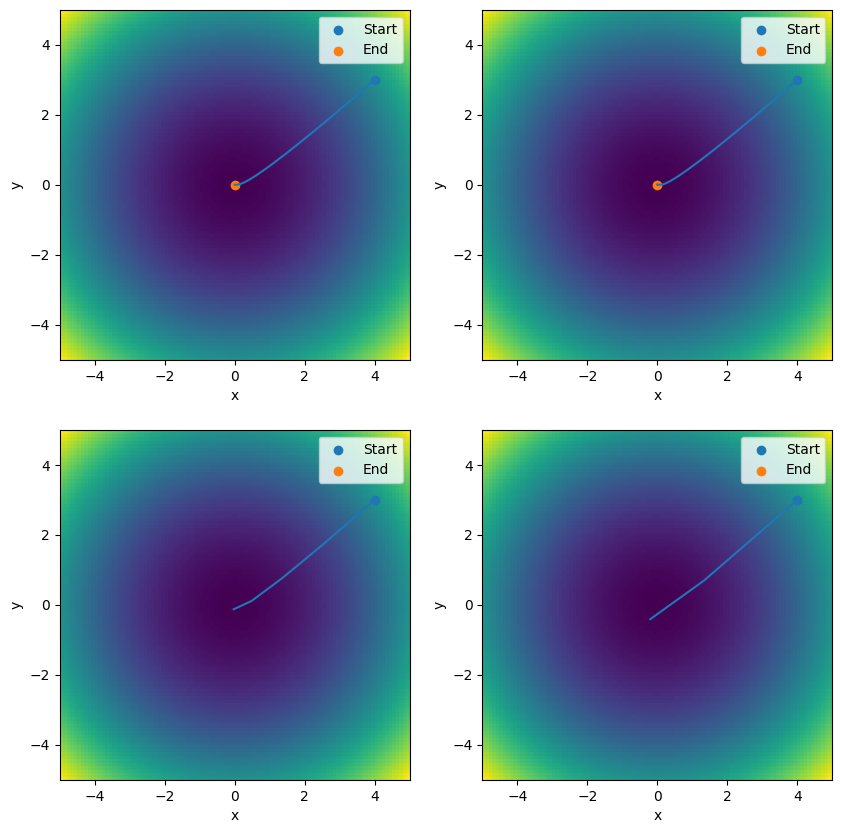

In [29]:
X0 = [4.0, 3.0]

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5 ,100)
X , Y = np.meshgrid(x,y)
y = F_2D(X0)

fig, axs = plt.subplots(2,2,figsize=(10, 10))
for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q], beta=.09 , epsilon=0.01)
    X_, cost = optimizer.optimize(F_2D,GradF_2D,X0)
    path_x = np.array( [q[0] for q,j in cost] )
    path_y = np.array( [q[1] for q,j in cost] )
    path_z = np.array( [ j   for q,j in cost] )
    axs[ int(q/2), q % 2].imshow( F_2D((X,Y)) , extent=[-5, 5, -5, 5], origin='lower', cmap='viridis')
    axs[ int(q/2), q % 2].scatter(path_x[0] , path_y[0] , label = "Start")
    axs[ int(q/2), q % 2].scatter(path_x[-1] , path_y[-1] , label = "End")
    axs[ int(q/2), q % 2].plot(path_x , path_y)
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].set_xlabel("x")
    axs[ int(q/2), q % 2].set_ylabel("y")

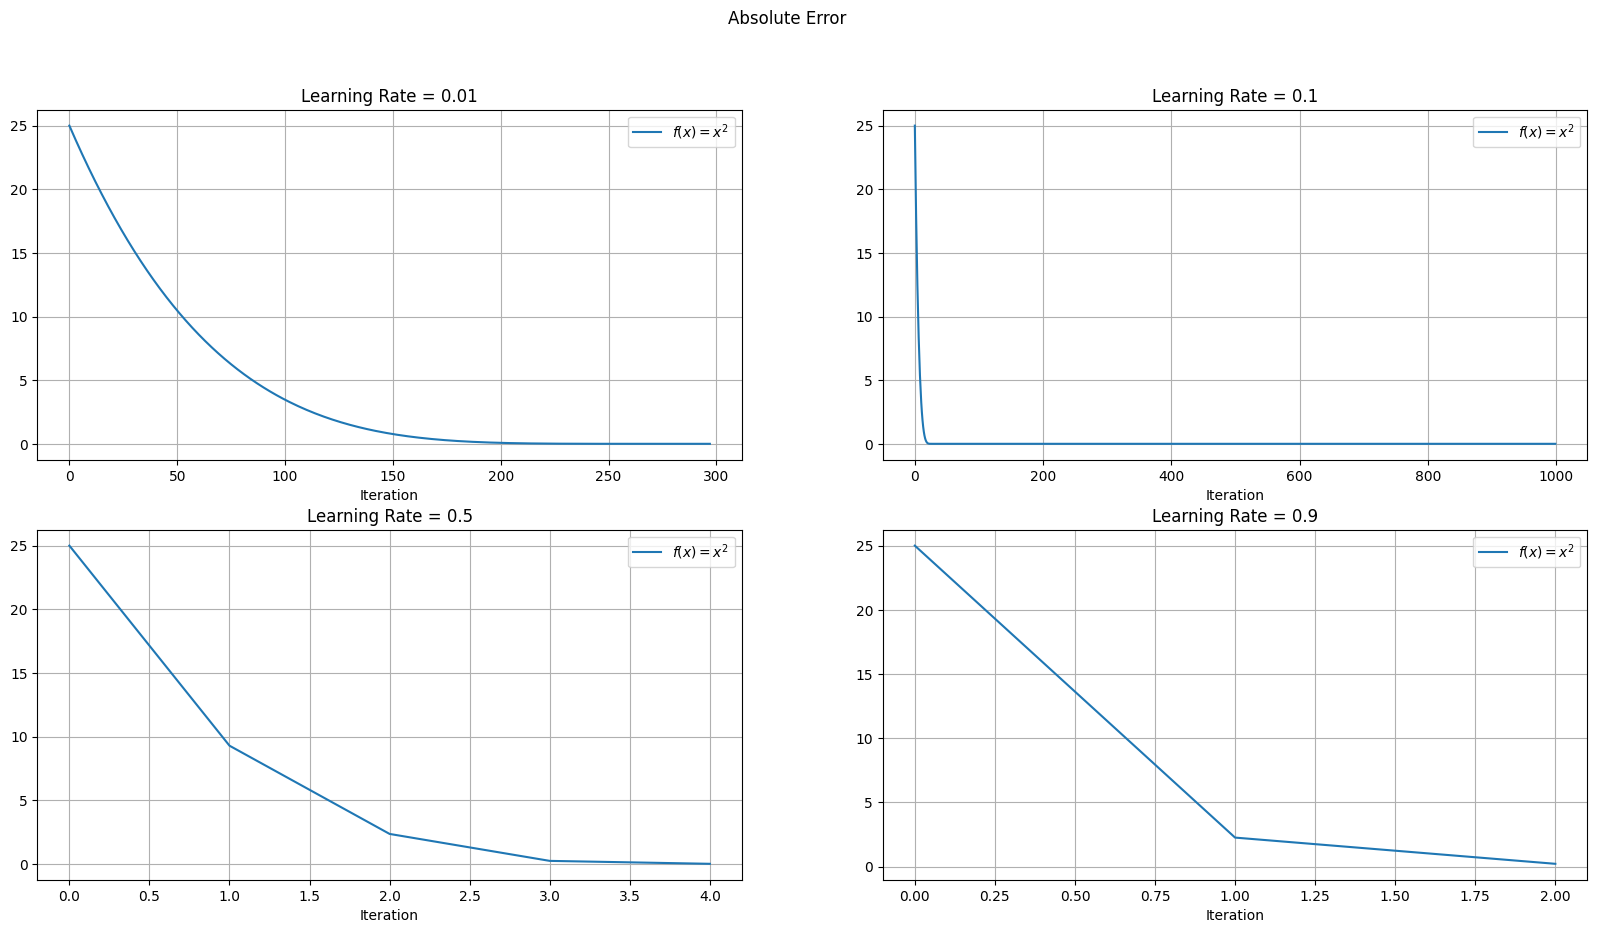

In [30]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Absolute Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q], beta=.09 , epsilon=0.01)
    X_, cost = optimizer.optimize(F_2D,GradF_2D,X0)
    path_x = np.array( [q[0] for q,j in cost] )
    path_y = np.array( [q[1] for q,j in cost] )
    path_z = np.array( [ j   for q,j in cost] )
    axs[ int(q/2), q % 2].plot(path_z, label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

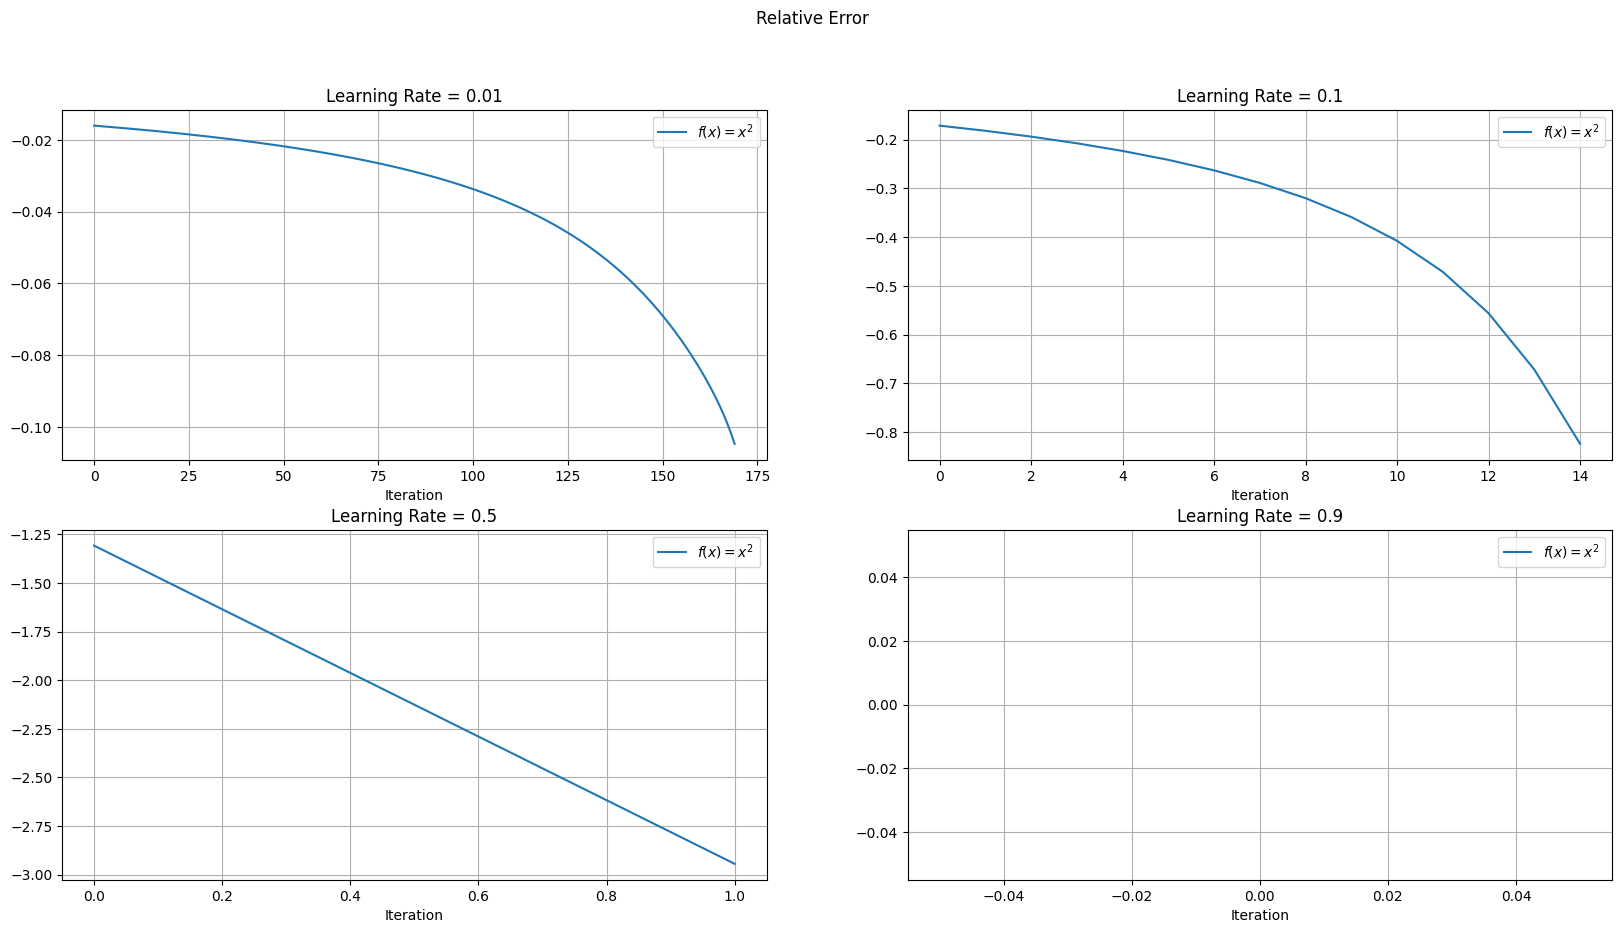

In [31]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Relative Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q], beta=.5 , epsilon=0.00001)
    X_, cost = optimizer.optimize(F_2D,GradF_2D,X0)
    path_x = np.array( [q[0] for q,j in cost] )
    path_y = np.array( [q[1] for q,j in cost] )
    path_z = np.array( [ j   for q,j in cost] )
    eps = np.abs(path_z[1:-1] - path_z[0:-2])
    rate = eps[1:-1] / eps[:-2]
    axs[ int(q/2), q % 2].plot( np.log(rate), label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

## Adaptive Moment Estimation

$$m_t = \beta_1 m_{t-1} + (1-\beta_1)\nabla J(\theta_t)$$
     
$$v_t = \beta_2 v_{t-1} + (1-\beta_2)(\nabla J(\theta_t))^2$$
     
$$\hat{m}_t = \frac{m_t}{1-\beta_1^t}$$
     
$$\hat{v}_t = \frac{v_t}{1-\beta_2^t}$$
     
$$\theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{\hat{v}_t} + \epsilon} \odot \hat{m}_t$$

In [32]:
alpha = [0.01 , .1 , .5 , .9]
model = ADAM

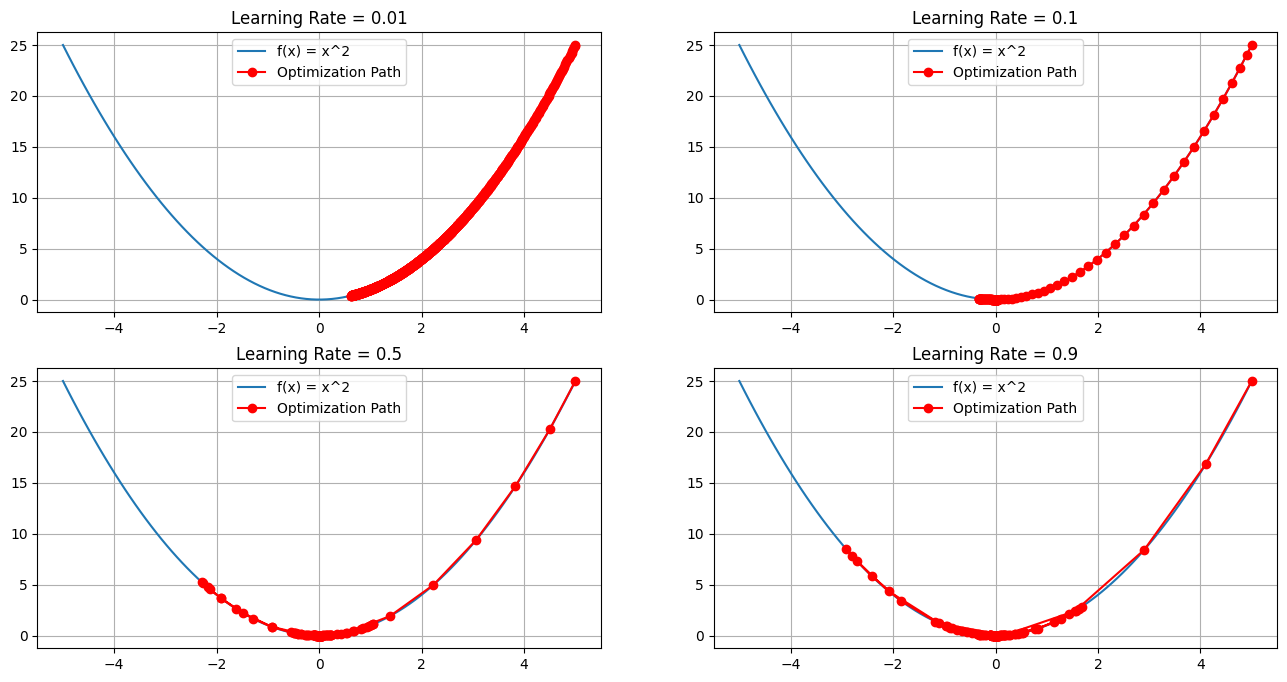

In [33]:
x = np.linspace(-5, 5, 100)
y = F_1D(x)
X0 = 5.0

fig, axs = plt.subplots(2,2,figsize=(16, 8))
for q in range(len(alpha)):
    optimizer = model(alpha=alpha[q] )
    X, cost = optimizer.optimize(F_1D,GradF_1D,X0)
    path_x = np.array( [q for q,j in cost] )
    path_y = np.array( [j for q,j in cost] )
    axs[ int(q/2), q % 2].plot(x, y , label="f(x) = x^2")
    axs[ int(q/2), q % 2].plot(path_x, path_y , "ro-" , label="Optimization Path")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)

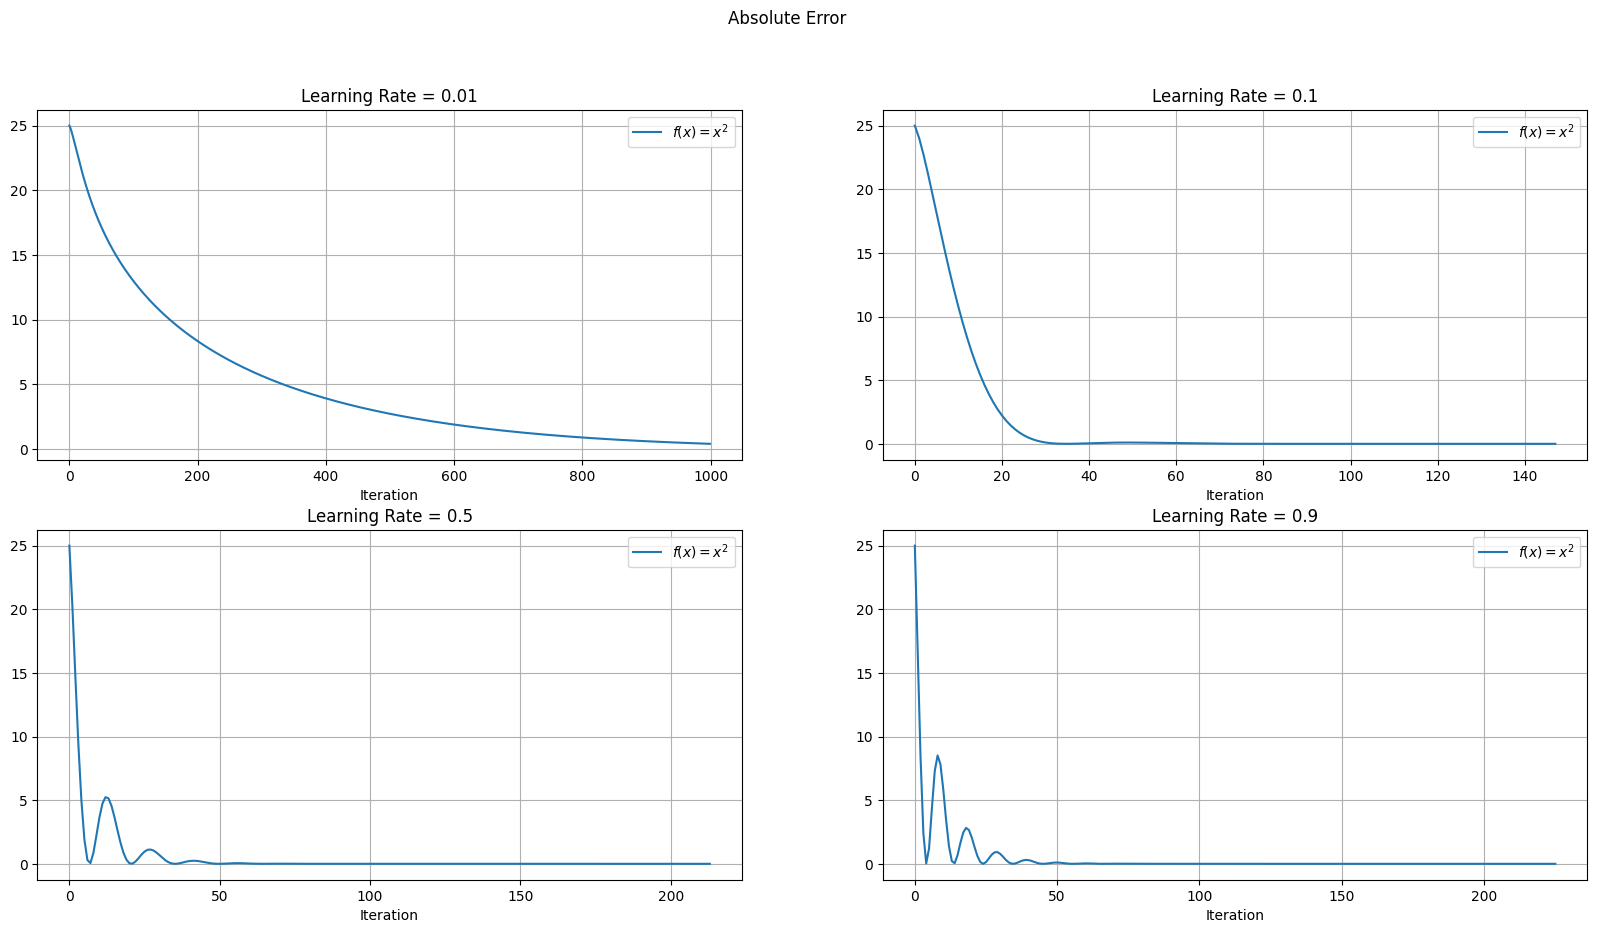

In [34]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Absolute Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X, cost = optimizer.optimize(F_1D,GradF_1D,X0)
    path_x = np.array( [q for q,j in cost] )
    path_y = np.array( [j for q,j in cost] )
    axs[ int(q/2), q % 2].plot(path_y, label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

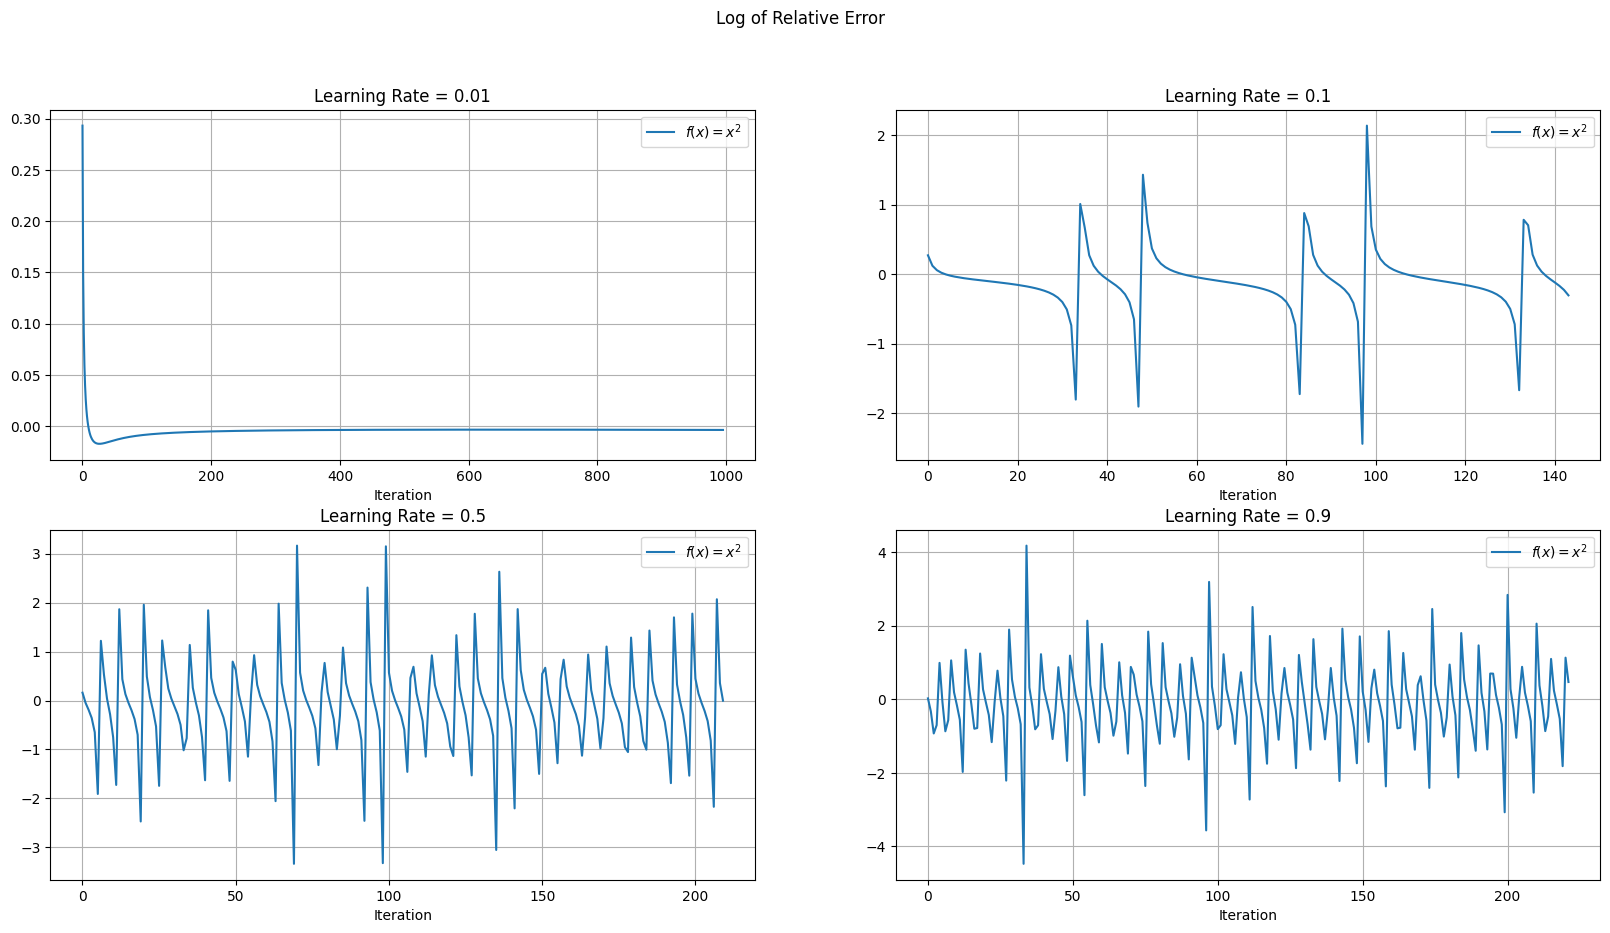

In [35]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Log of Relative Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X, cost = optimizer.optimize(F_1D,GradF_1D,X0)
    path_x = np.array( [q for q,j in cost] )
    path_y = np.array( [j for q,j in cost] )
    eps = np.abs(path_y[1:-1] - path_y[0:-2])
    rate = eps[1:-1] / eps[:-2]
    axs[ int(q/2), q % 2].plot( np.log(rate), label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

b.) $$ f(x,y) = x^2 + y^2 $$

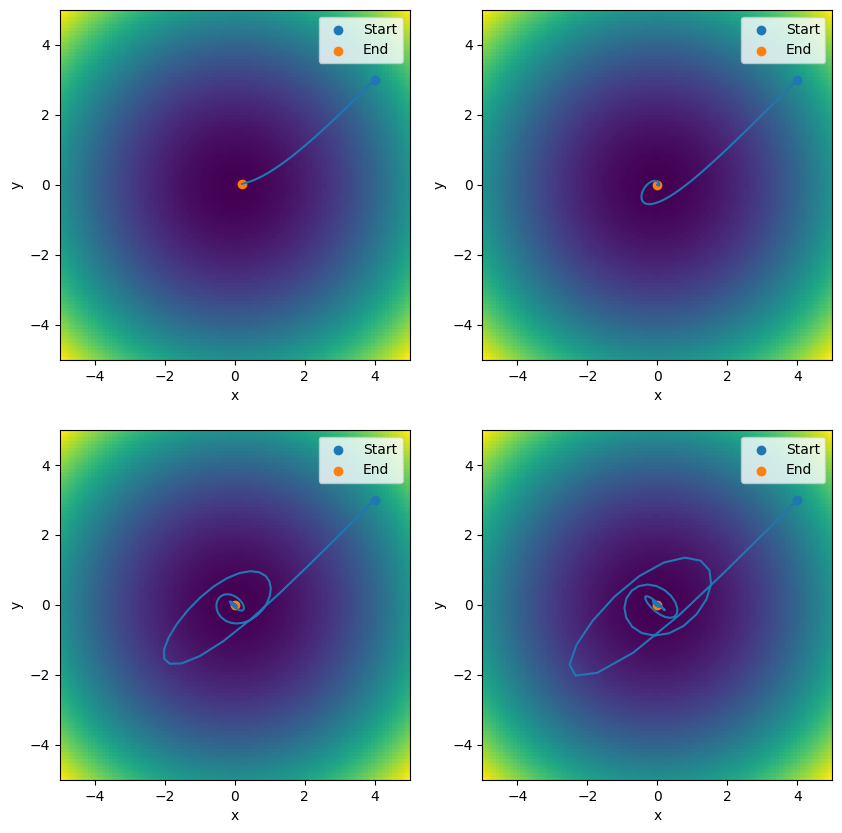

In [36]:
X0 = [4.0, 3.0]

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5 ,100)
X , Y = np.meshgrid(x,y)
y = F_2D(X0)

fig, axs = plt.subplots(2,2,figsize=(10, 10))
for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X_, cost = optimizer.optimize(F_2D,GradF_2D,X0)
    path_x = np.array( [q[0] for q,j in cost] )
    path_y = np.array( [q[1] for q,j in cost] )
    path_z = np.array( [ j   for q,j in cost] )
    axs[ int(q/2), q % 2].imshow( F_2D((X,Y)) , extent=[-5, 5, -5, 5], origin='lower', cmap='viridis')
    axs[ int(q/2), q % 2].scatter(path_x[0] , path_y[0] , label = "Start")
    axs[ int(q/2), q % 2].scatter(path_x[-1] , path_y[-1] , label = "End")
    axs[ int(q/2), q % 2].plot(path_x , path_y)
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].set_xlabel("x")
    axs[ int(q/2), q % 2].set_ylabel("y")

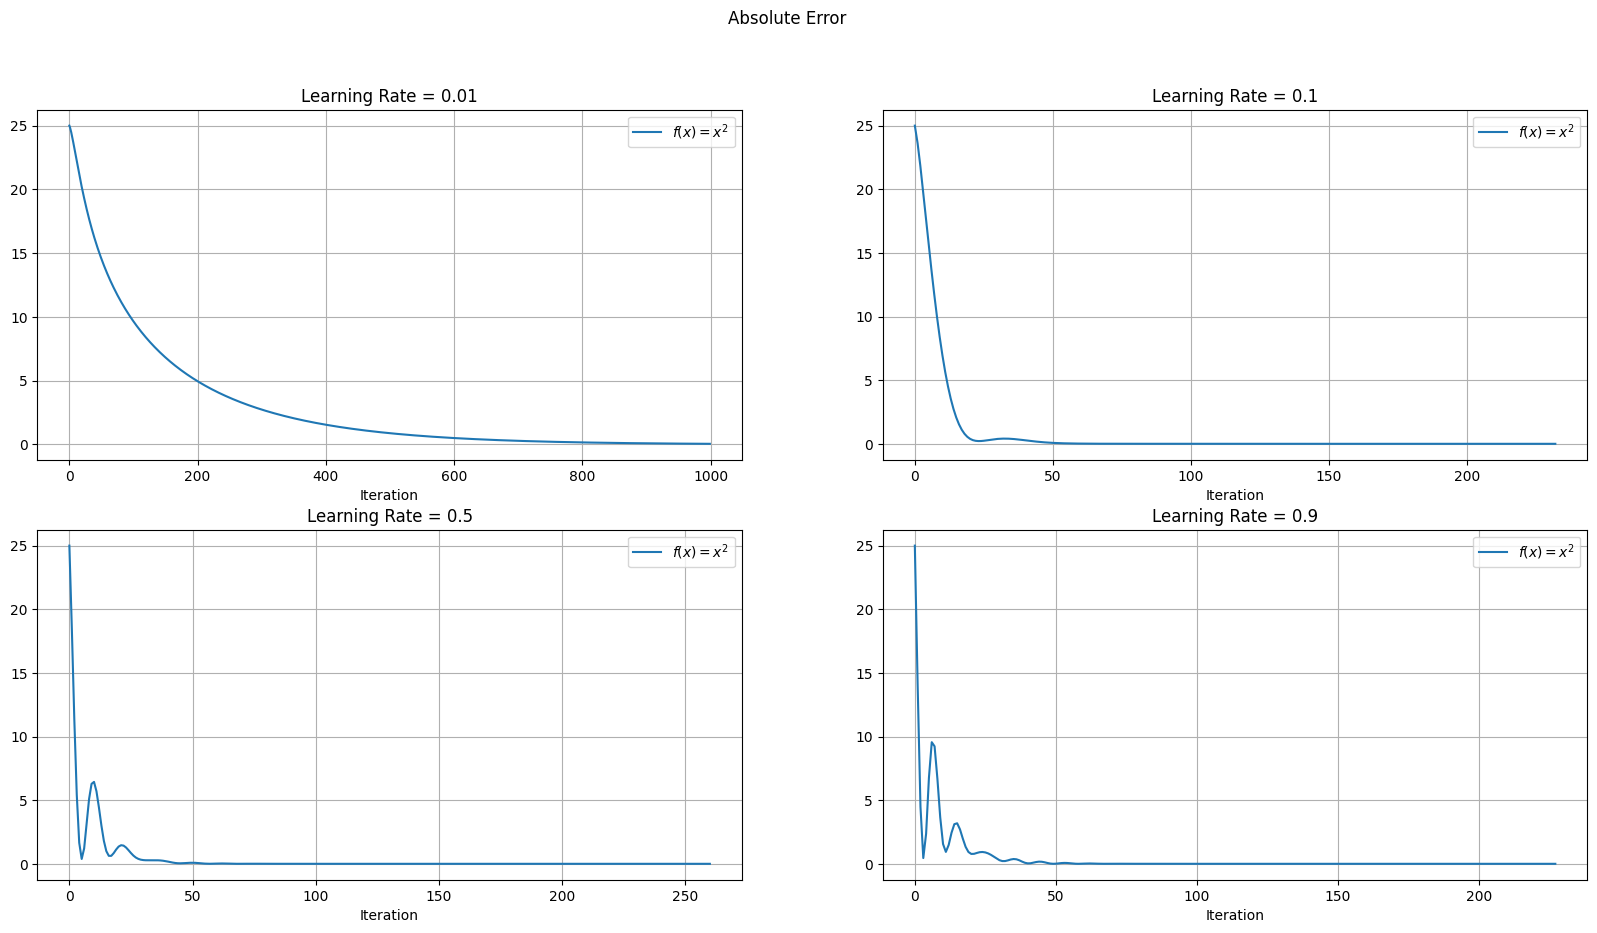

In [37]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Absolute Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X_, cost = optimizer.optimize(F_2D,GradF_2D,X0)
    path_x = np.array( [q[0] for q,j in cost] )
    path_y = np.array( [q[1] for q,j in cost] )
    path_z = np.array( [ j   for q,j in cost] )
    axs[ int(q/2), q % 2].plot(path_z, label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

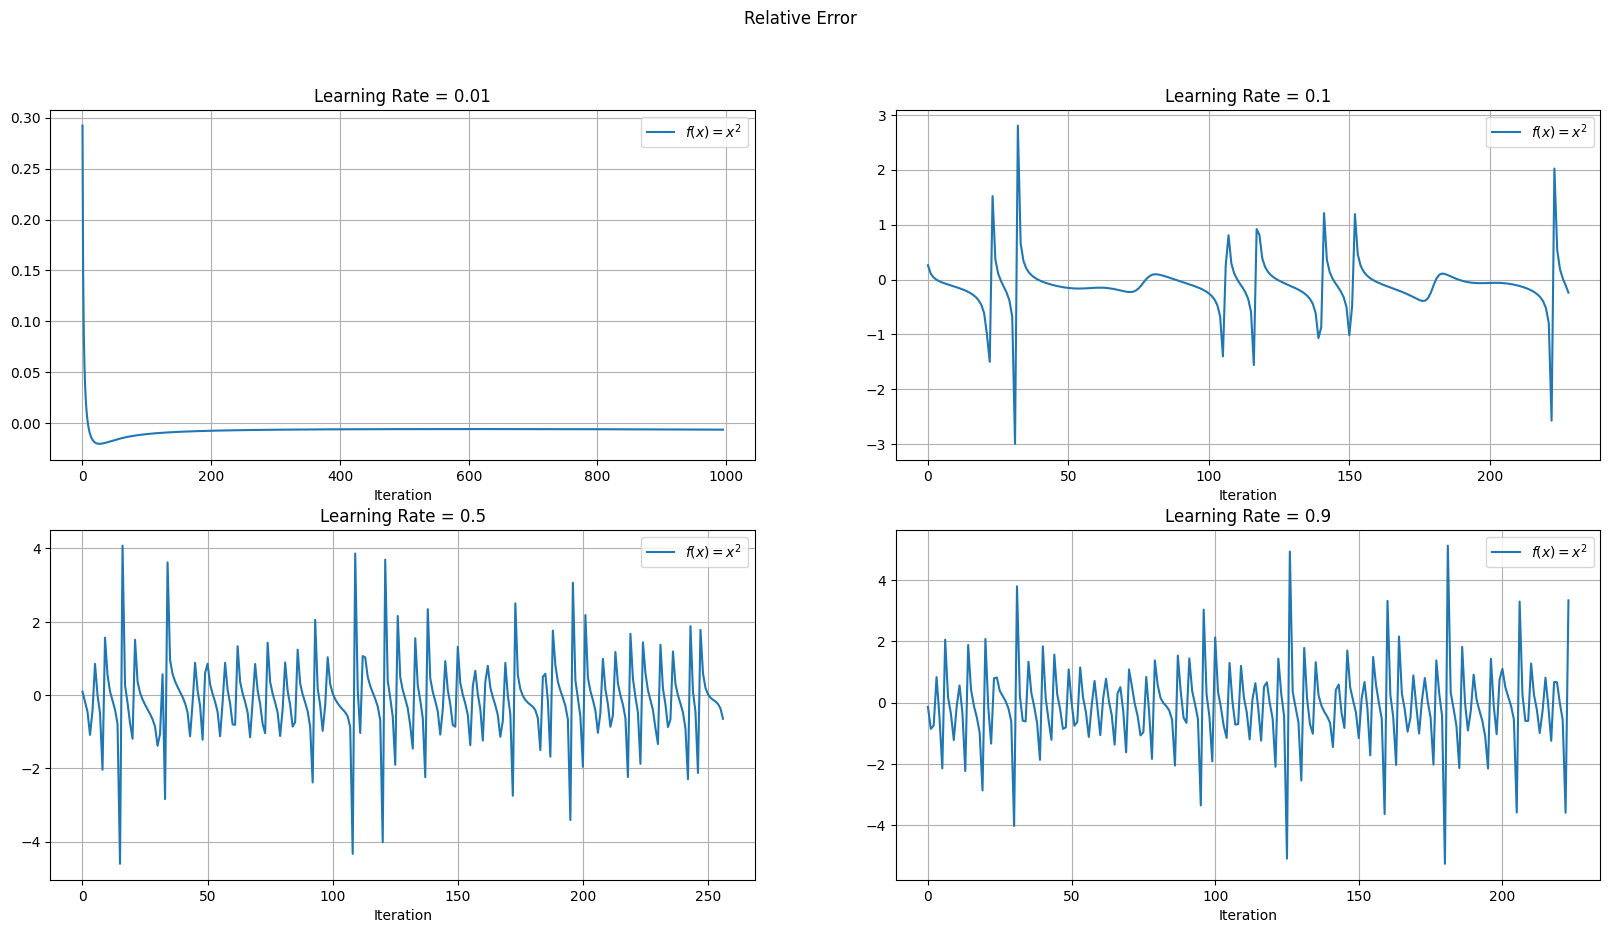

In [38]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle("Relative Error")

for q in range(len(alpha)):
    optimizer = model(alpha = alpha[q])
    X_, cost = optimizer.optimize(F_2D,GradF_2D,X0)
    path_x = np.array( [q[0] for q,j in cost] )
    path_y = np.array( [q[1] for q,j in cost] )
    path_z = np.array( [ j   for q,j in cost] )
    eps = np.abs(path_z[1:-1] - path_z[0:-2])
    rate = eps[1:-1] / eps[:-2]
    axs[ int(q/2), q % 2].plot( np.log(rate), label=r"$f(x) = x^2$")
    axs[ int(q/2), q % 2].set_title('Learning Rate = {}'.format(alpha[q]) )
    axs[ int(q/2), q % 2].legend()
    axs[ int(q/2), q % 2].grid(True)
    axs[ int(q/2), q % 2].set_xlabel("Iteration")

### Gradient Descent Optimizers in Linear Regression

The objective function for linear regression is defined as:

$$ F(m, b) = \frac{1}{n} \sum_{i=1}^{n} (Y_i - (m X_i + b))^2 $$

where

* $Y_i$ - is the actual output for the $i$-th data point.
* $X_i$ - is the input feature for the $i$-th data point.
* $n$   - is the number of data points.

The gradient of the objective function with respect to the parameters $m$  and $b$ is given by:

\begin{aligned}
    \nabla F(m, b) &= \left[ \frac{\partial F}{\partial m}, \frac{\partial F}{\partial b} \right] \\
    \frac{\partial F}{\partial m} &= -\frac{2}{n} \sum_{i=1}^{n} X_i (Y_i - (m X_i + b)) \\
    \frac{\partial F}{\partial b} &= -\frac{2}{n} \sum_{i=1}^{n} (Y_i - (m X_i + b))
\end{aligned}

In [39]:
a_real = 3
b_real = 4
n = 100

Models = [MGD() , NAG() , ADG() , RMS() , ADAM()]
X_data = np.random.rand(n)
Y_data = b_real + a_real * X_data + np.random.randn(n)
X0=[0.0, 0.0]

def F_LinearRegression(params):
    m, b = params
    y_pred = m * X_data + b
    return np.mean((Y_data - y_pred) ** 2)

def GradF_LinearRegression(params):
    m, b = params
    y_pred = m * X_data + b
    grad_m = -2 * np.mean(X_data * (Y_data - y_pred))
    grad_b = -2 * np.mean(Y_data - y_pred)
    return [grad_m, grad_b]

def predict_LinearRegression(model):
    X_ , cost_history = model.optimize(F_LinearRegression , GradF_LinearRegression , X0)
    a_trained , b_trained = X_
    y_pred = a_trained * X_data + b_trained
    return y_pred , cost_history

Y1_MGD , cost_mgd_history = predict_LinearRegression( MGD() )
Y1_NAG , cost_nag_history = predict_LinearRegression( NAG() )
Y1_ADG , cost_adg_history = predict_LinearRegression( ADG() )
Y1_RMS , cost_rms_history = predict_LinearRegression( RMS(beta=1) )
Y1_ADAM , cost_adam_history = predict_LinearRegression( ADAM() )

In [40]:
cost_mgd = np.array( [j  for q,j in cost_mgd_history] )
cost_nag = np.array( [j  for q,j in cost_nag_history] )
cost_adg = np.array( [j  for q,j in cost_adg_history] )
cost_rms = np.array( [j  for q,j in cost_rms_history] )
cost_adam = np.array( [j  for q,j in cost_adam_history] )

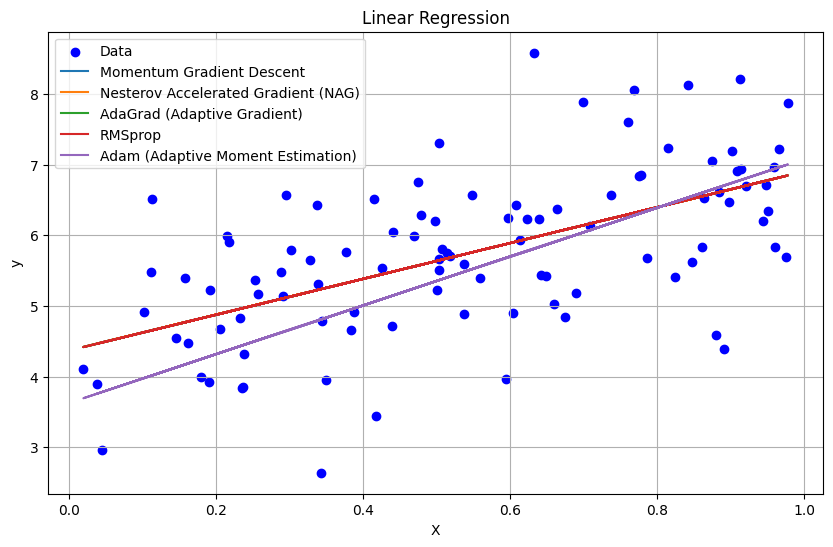

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(X_data, Y_data, color='blue', label='Data')
plt.plot(X_data , Y1_MGD , label = "Momentum Gradient Descent")
plt.plot(X_data , Y1_NAG , label = "Nesterov Accelerated Gradient (NAG)")
plt.plot(X_data , Y1_ADG , label = "AdaGrad (Adaptive Gradient)")
plt.plot(X_data , Y1_RMS , label = "RMSprop")
plt.plot(X_data , Y1_ADAM ,label = "Adam (Adaptive Moment Estimation)")

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid()
plt.show()

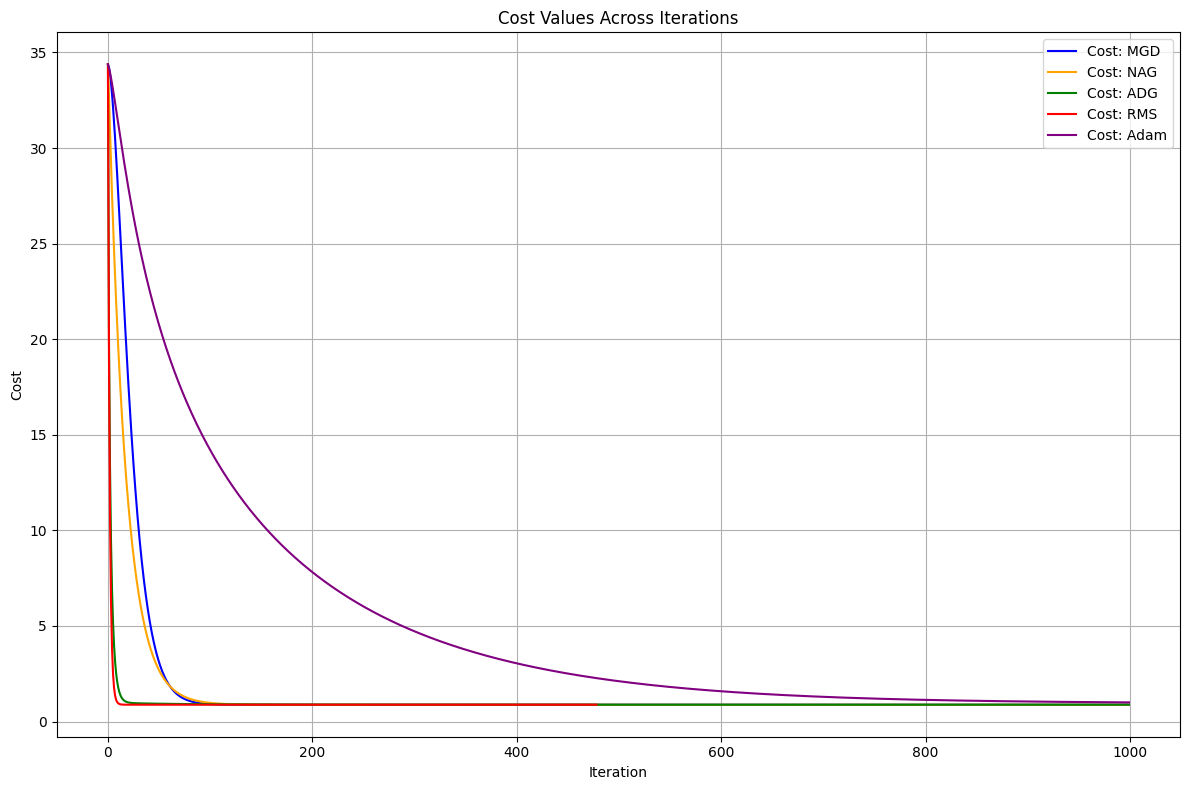

In [42]:
plt.figure(figsize=(12, 8))
plt.plot(cost_mgd, label='Cost: MGD', color='blue')
plt.plot(cost_nag, label='Cost: NAG', color='orange')
plt.plot(cost_adg, label='Cost: ADG', color='green')
plt.plot(cost_rms, label='Cost: RMS', color='red')
plt.plot(cost_adam, label='Cost: Adam', color='purple')

plt.title('Cost Values Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.tight_layout()

### Gradient Descent Optimizers in Logistic Regression

The objective function for logistic regression is:

$$ F(w, b) = -\frac{1}{n} \sum_{i=1}^{n} \left( Y_i \log(h(w^T X_i + b)) + (1 - Y_i) \log(1 - h(w^T X_i + b)) \right) $$

* $Y_i$ is the actual output for the $i$ -th data point (0 or 1).
* $X_i$ is the input feature vector for the $i$-th data point.
* $h(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.
* $n$  is the number of data points.

The gradient of the objective function with respect to the parameters is

\begin{aligned}
    \nabla F(w, b) &= \left[ \frac{\partial F}{\partial w}, \frac{\partial F}{\partial b} \right] \\
    \frac{\partial F}{\partial w} &= -\frac{1}{n} \sum_{i=1}^{n} (Y_i - h(w^T X_i + b)) X_i \\
    \frac{\partial F}{\partial b} &= -\frac{1}{n} \sum_{i=1}^{n} (Y_i - h(w^T X_i + b))
\end{aligned}


In [43]:
a_real = 3
b_real = -4
X0 = [0.0, 0.0]
n = 100
K = .2

def sigmoid(z):
    return 1 / (1+np.exp(-z))


X_data = np.random.randn(n) / K
logits_data = a_real * X_data + b_real
h = sigmoid(logits_data)
Y_data = (h > K).astype(int)

def F_LogisticRegression(params):
    m, b = params
    logits = m * X_data + b
    y_pred = sigmoid(logits)
    return -np.mean(Y_data * np.log(y_pred + 1e-9) + (1 - Y_data) * np.log(1 - y_pred + 1e-9))

def GradF_LogisticRegression(params):
    m, b = params
    logits = m * X_data + b
    y_pred = sigmoid(logits)
    grad_m = np.mean((y_pred - Y_data) * X_data)
    grad_b = np.mean(y_pred - Y_data)
    return [grad_m, grad_b]


def predict_LogisticRegression(model):
    X_, cost_history = model.optimize(F_LogisticRegression, GradF_LogisticRegression, X0)
    a_trained, b_trained = X_
    logit = a_trained * X_data + b_trained
    h = sigmoid(logit)
    return h , cost_history

In [44]:
Y1_MGD , cost_mgd_history = predict_LogisticRegression( MGD() )
Y1_NAG , cost_nag_history = predict_LogisticRegression( NAG() )
Y1_ADG , cost_adg_history = predict_LogisticRegression( ADG() )
Y1_RMS , cost_rms_history = predict_LogisticRegression( RMS(beta=1) )
Y1_ADAM , cost_adam_history = predict_LogisticRegression( ADAM() )

cost_mgd = np.array( [j  for q,j in cost_mgd_history] )
cost_nag = np.array( [j  for q,j in cost_nag_history] )
cost_adg = np.array( [j  for q,j in cost_adg_history] )
cost_rms = np.array( [j  for q,j in cost_rms_history] )
cost_adam = np.array( [j  for q,j in cost_adam_history] )

<Axes: title={'center': 'Logistic Regression'}>

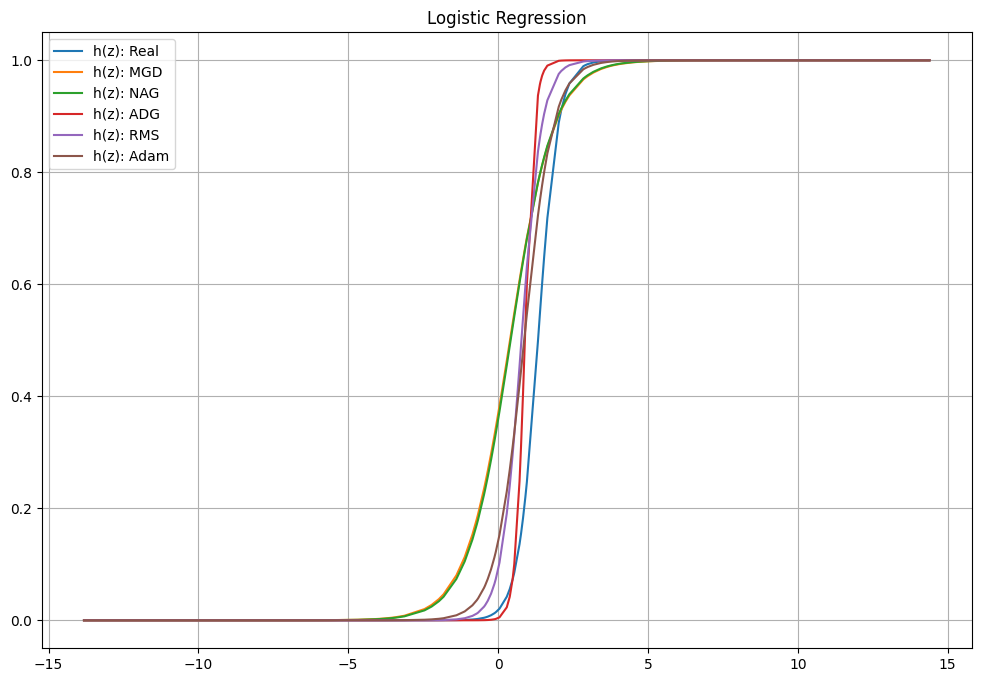

In [45]:
df = pd.DataFrame({'h(z): Real':h, 
                   'h(z): MGD':Y1_MGD,
                   'h(z): NAG':Y1_NAG,
                   'h(z): ADG':Y1_ADG,
                   'h(z): RMS':Y1_RMS,
                   'h(z): Adam':Y1_ADAM} , index=X_data)
df.sort_index().plot( figsize=(12, 8) , grid = True , title="Logistic Regression")

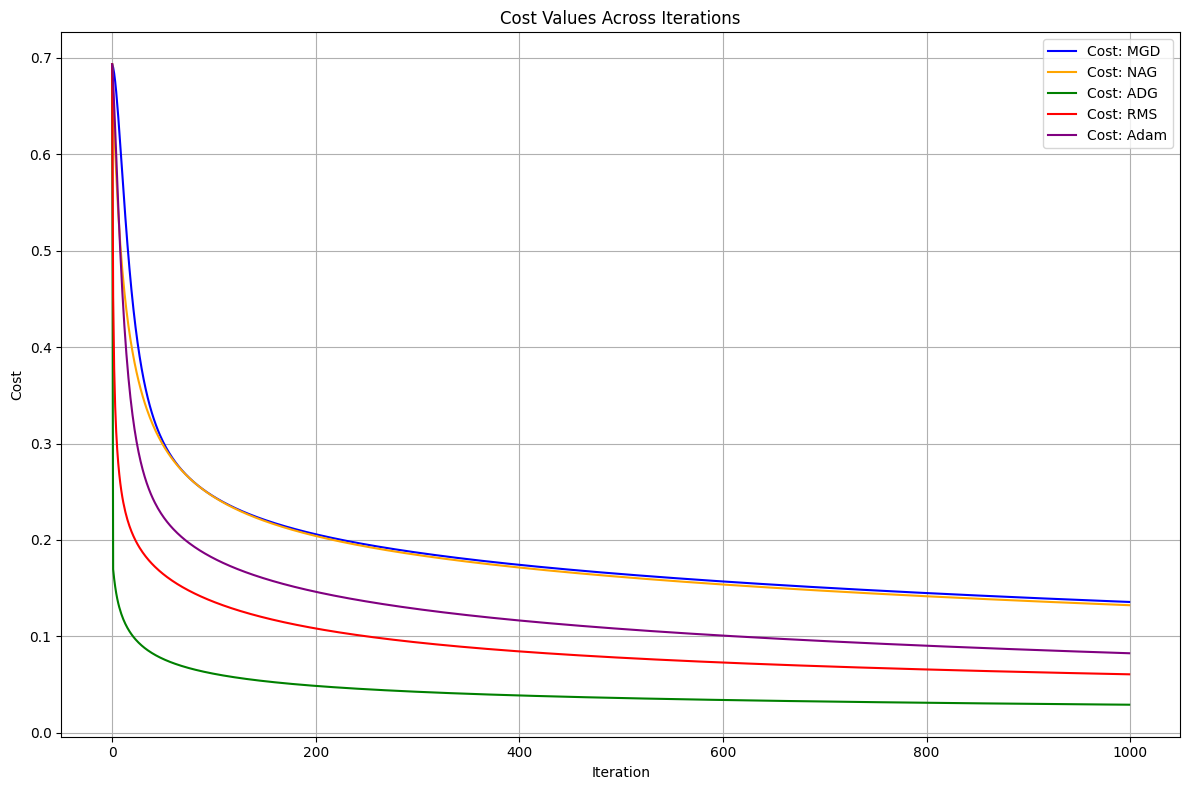

In [46]:
plt.figure(figsize=(12, 8))
plt.plot(cost_mgd, label='Cost: MGD', color='blue')
plt.plot(cost_nag, label='Cost: NAG', color='orange')
plt.plot(cost_adg, label='Cost: ADG', color='green')
plt.plot(cost_rms, label='Cost: RMS', color='red')
plt.plot(cost_adam, label='Cost: Adam', color='purple')

plt.title('Cost Values Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.tight_layout()